In [75]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np 
from scipy.io import loadmat,savemat


percents=[10,20,40,60,100] 
ROIs=['V1_45','V1_90','V1_135','PPC_45','PPC_90','PPC_135']

fs=20	 # sampling frequency 
ts=1/fs   # sampling time 
tt=np.arange(-1,5,ts)

xmin=-0.5
xmax=4

os.chdir('/media/olive/Research/oliver/IEMdecodingForCalciumData/decoding/slopes/task')

In [76]:
os.listdir()
#os.chdir('..')

['V1_45', 'PPC_45', 'PPC_90', 'V1_135', 'PPC_135', 'V1_90']

/tmp/ipykernel_2789608/4283328206.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(7,figsize=(10,20))


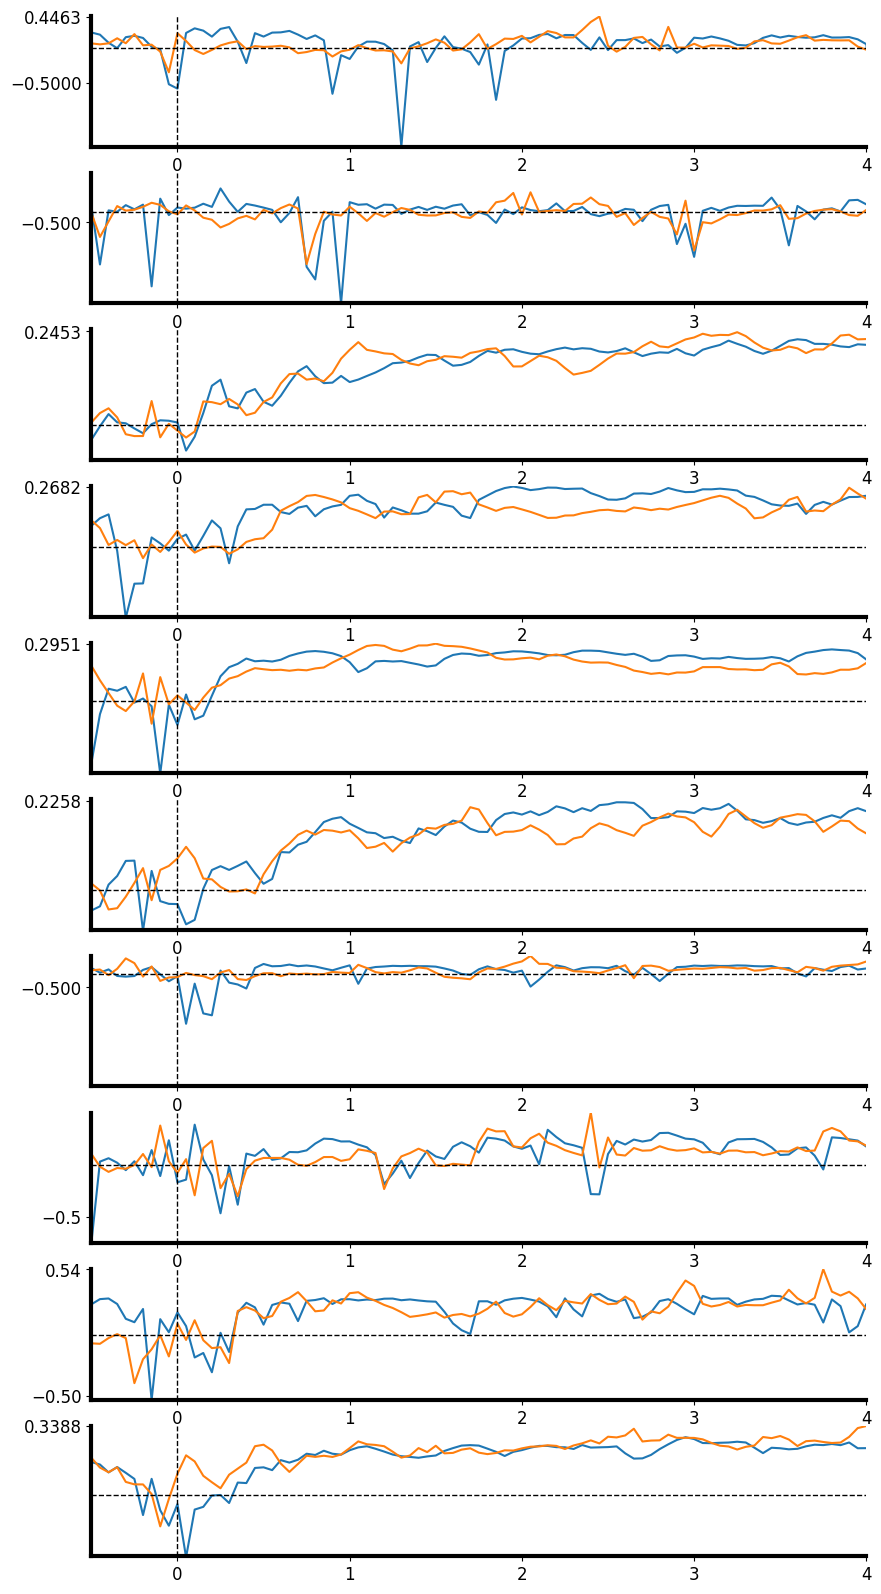

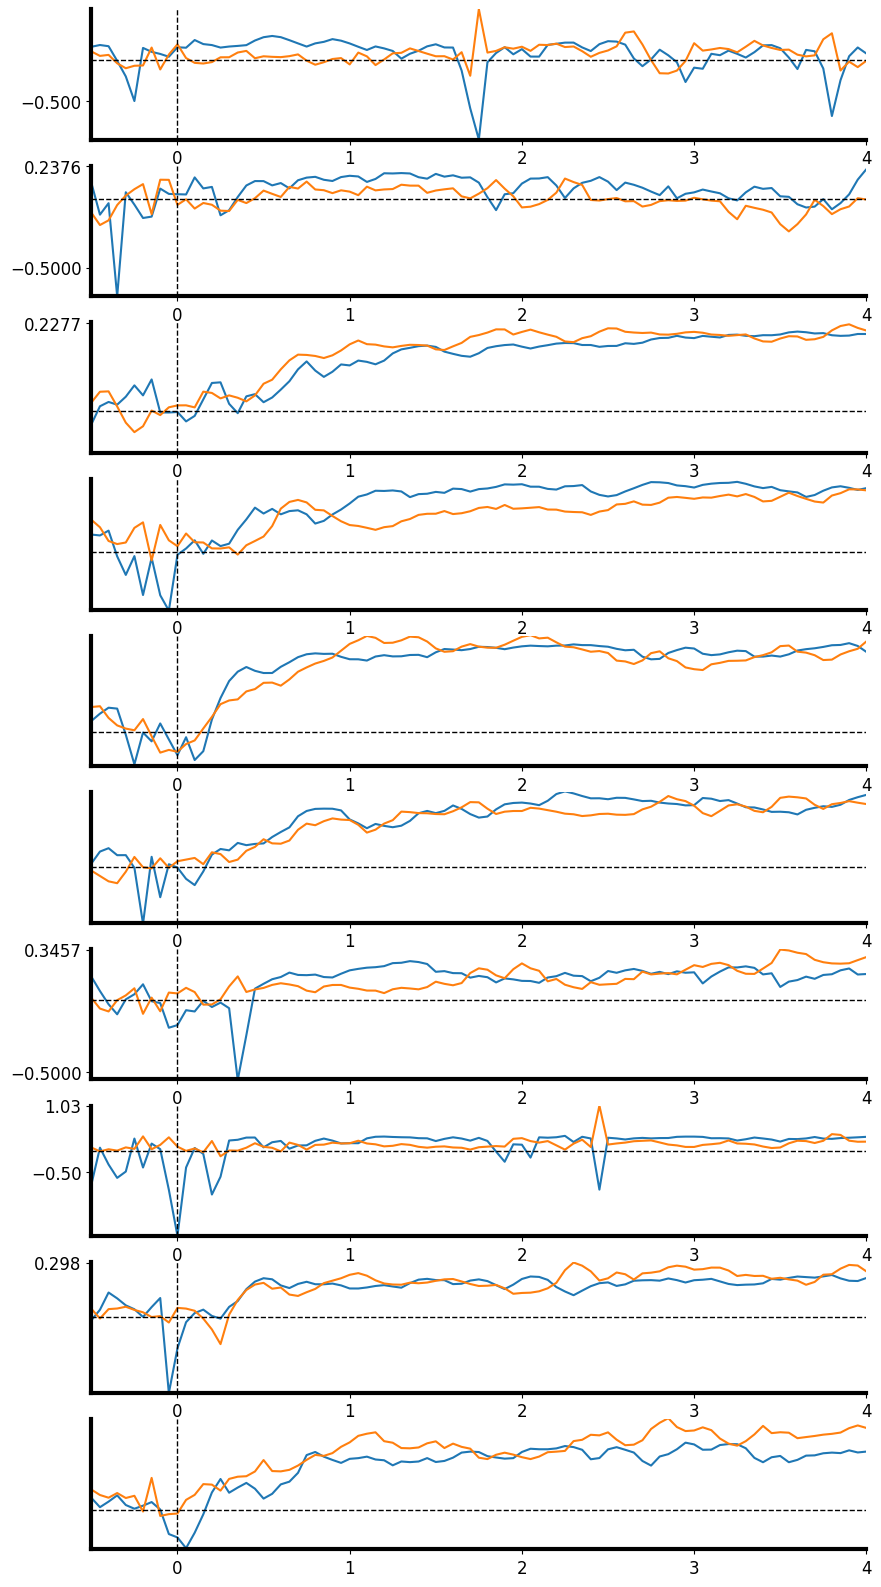

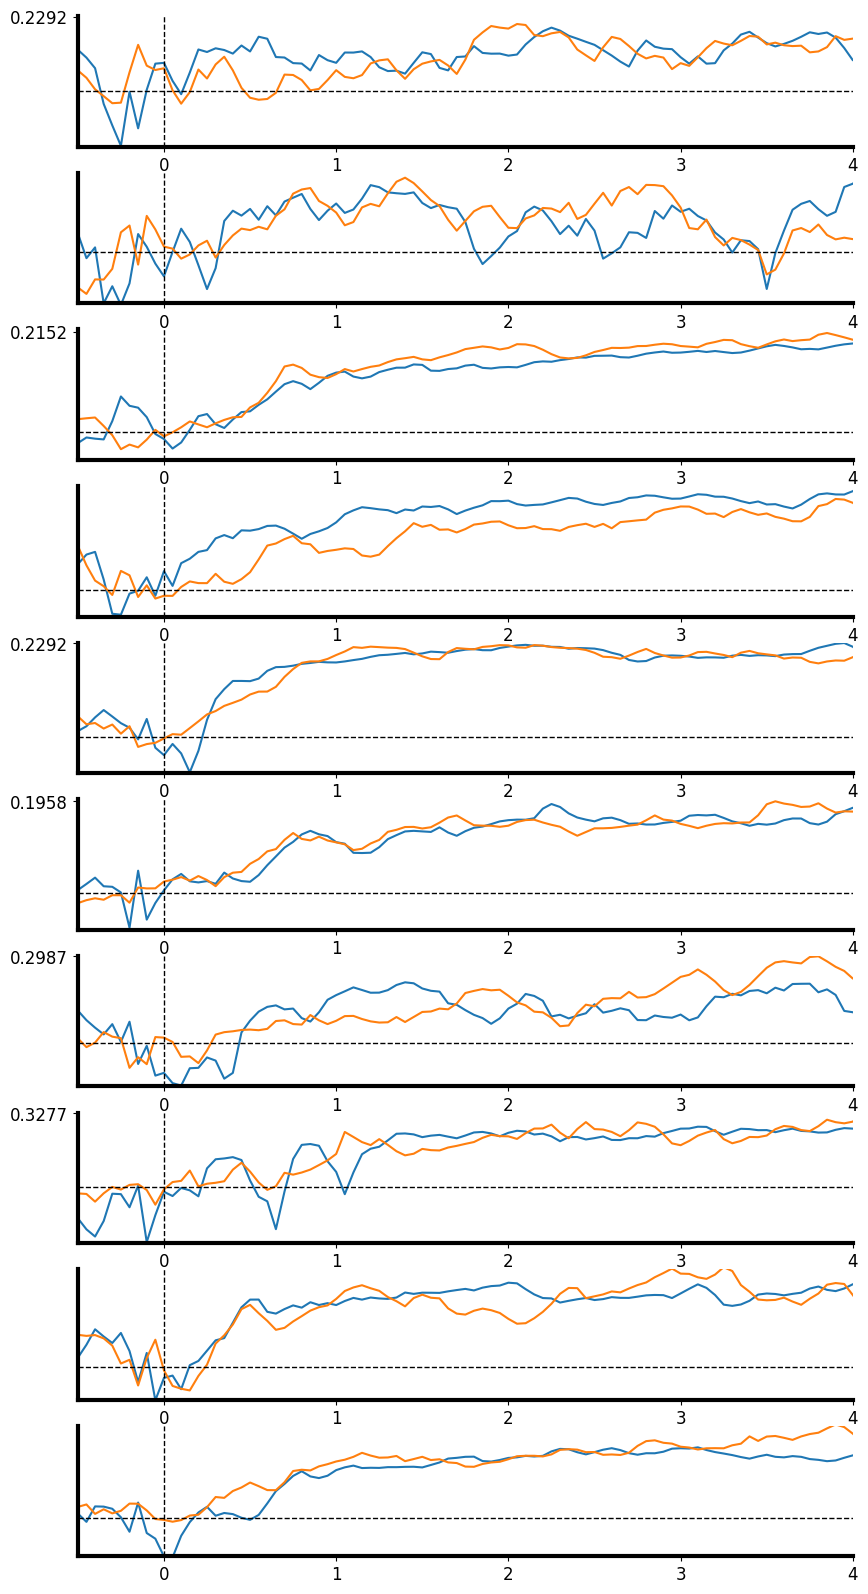

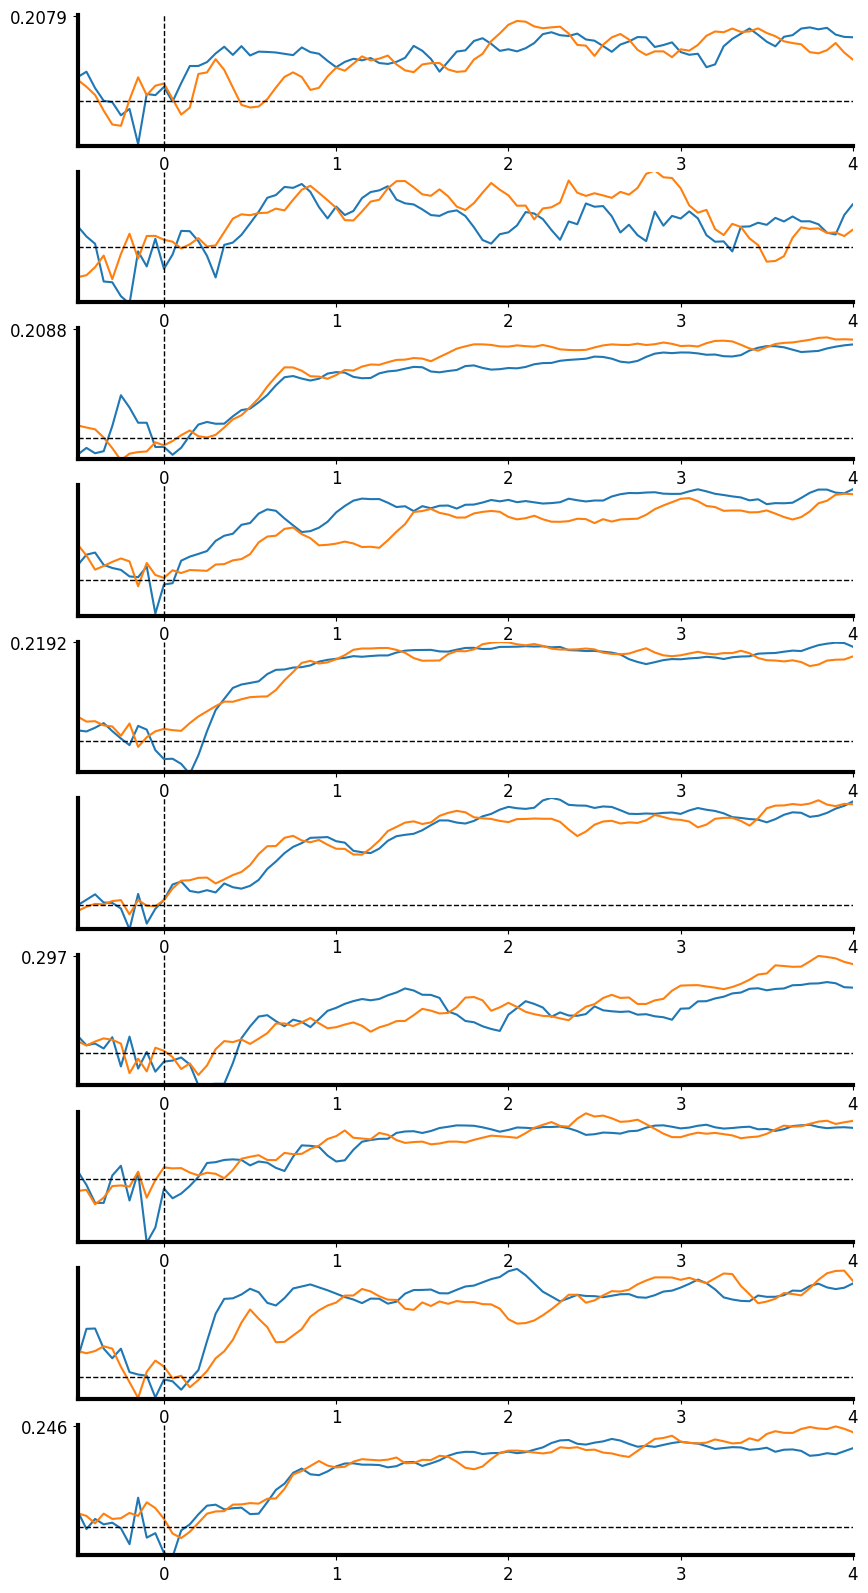

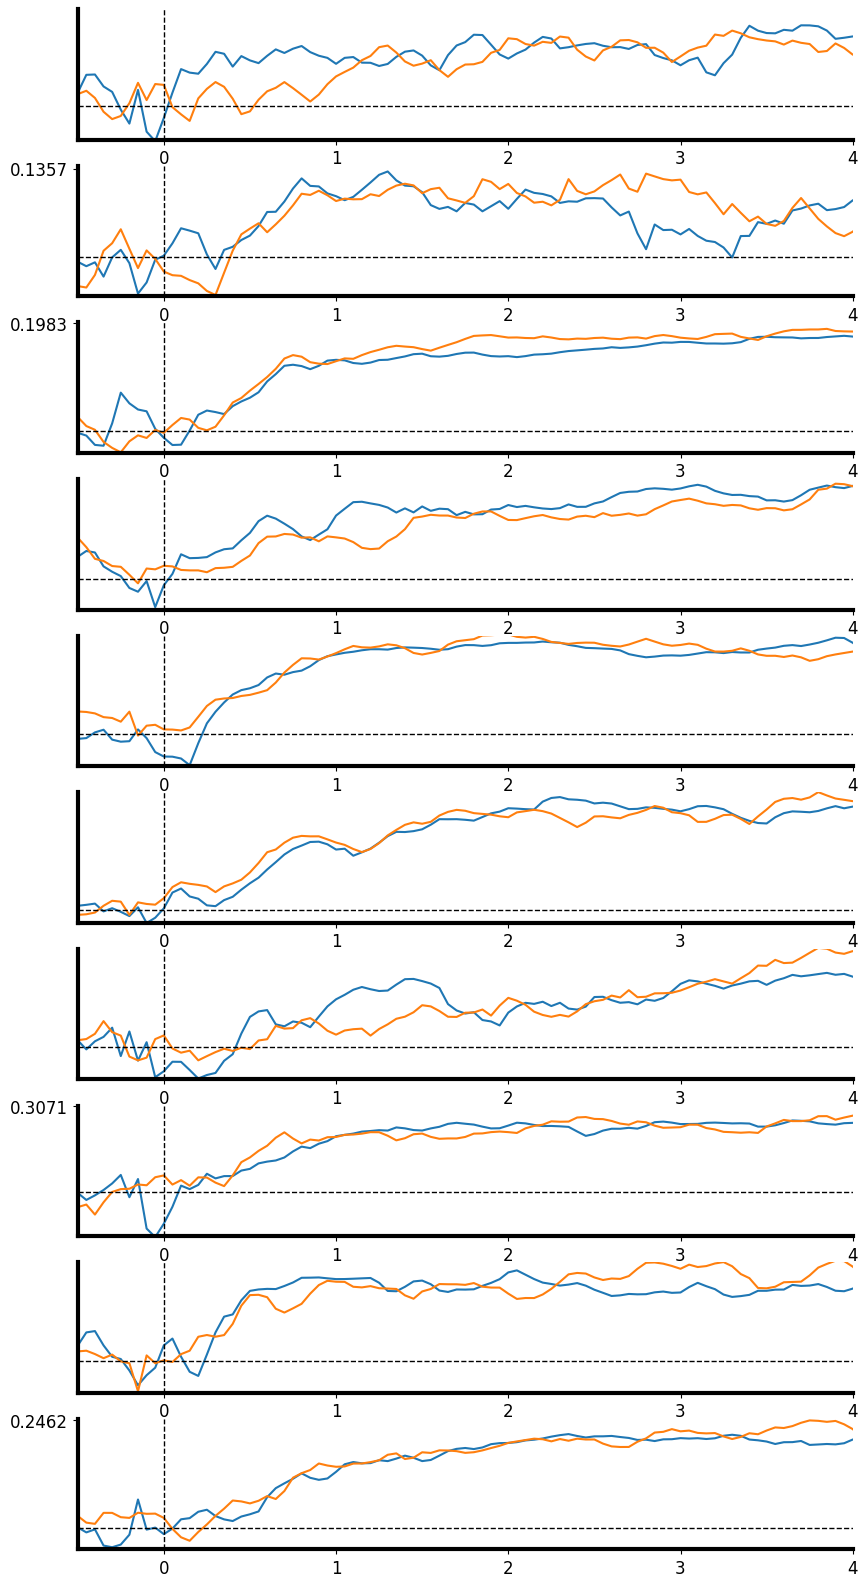

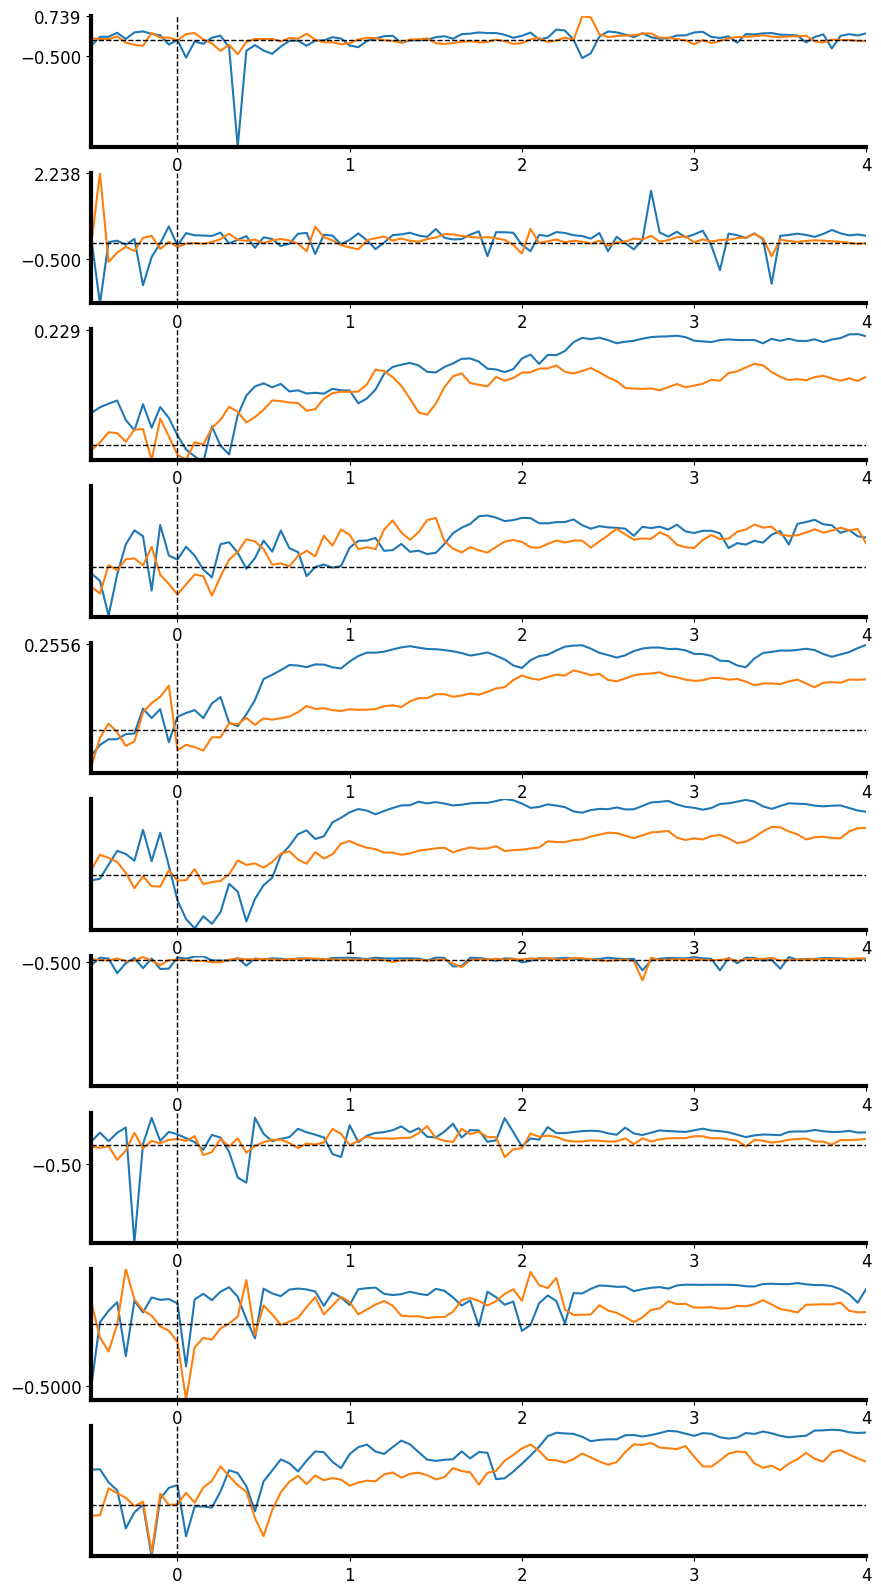

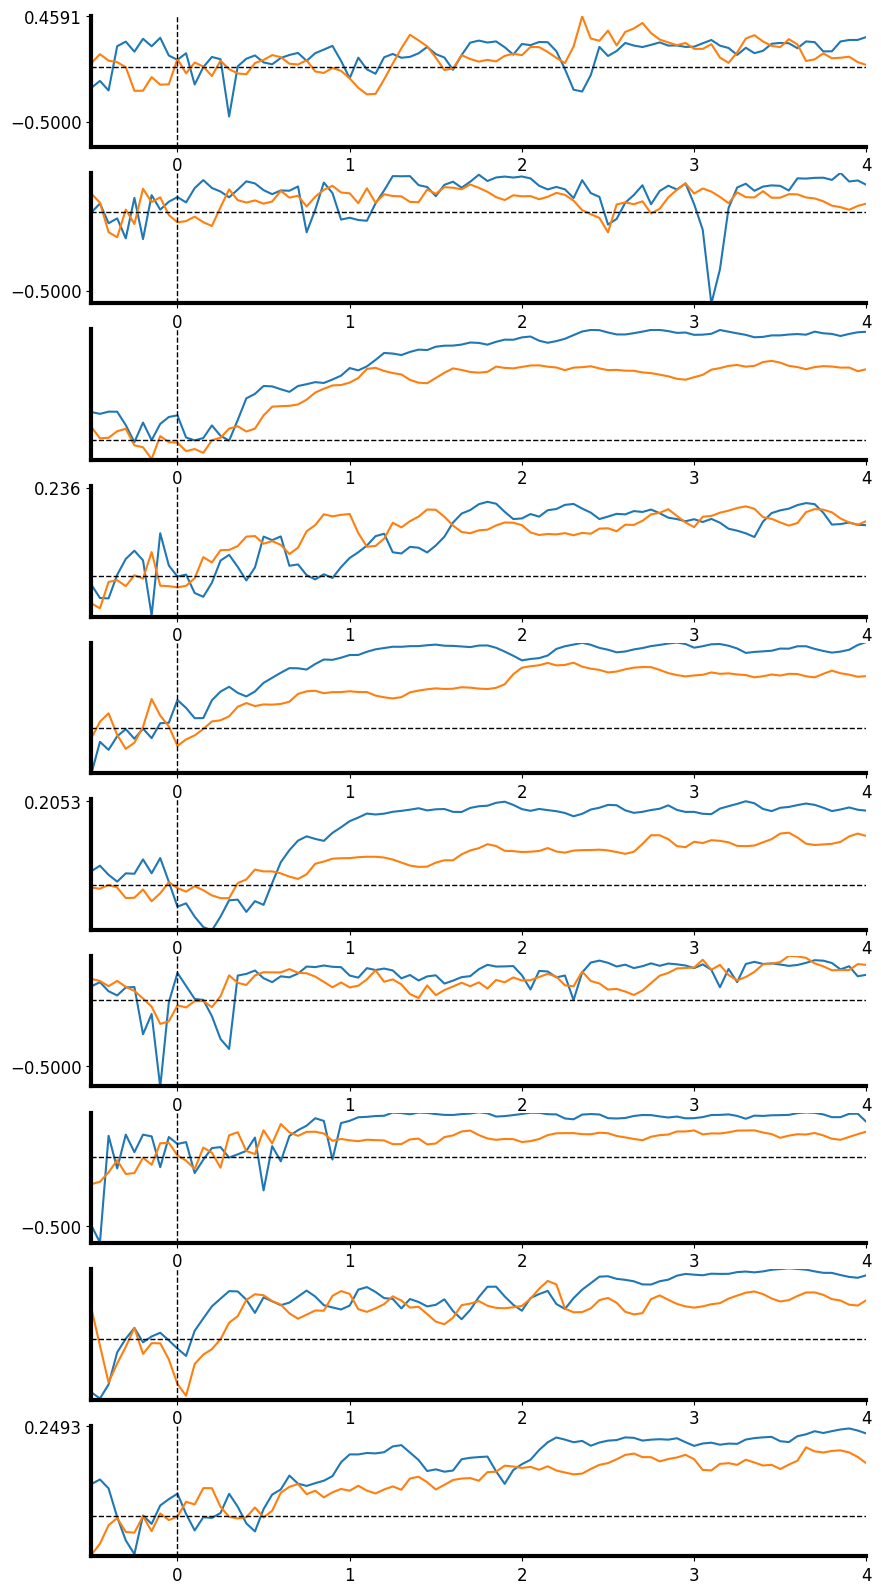

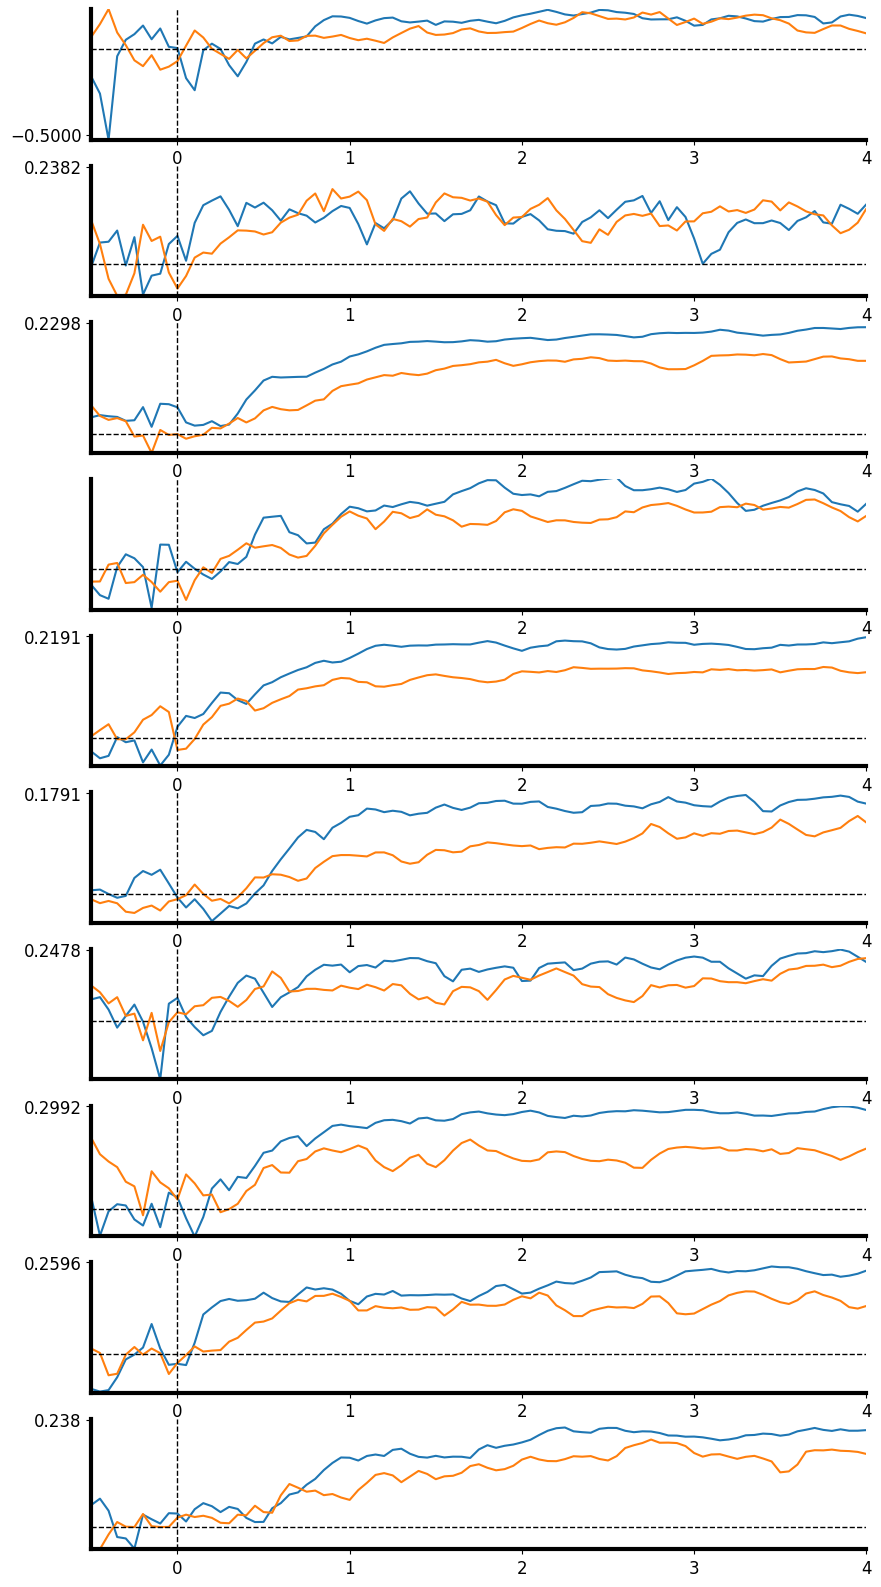

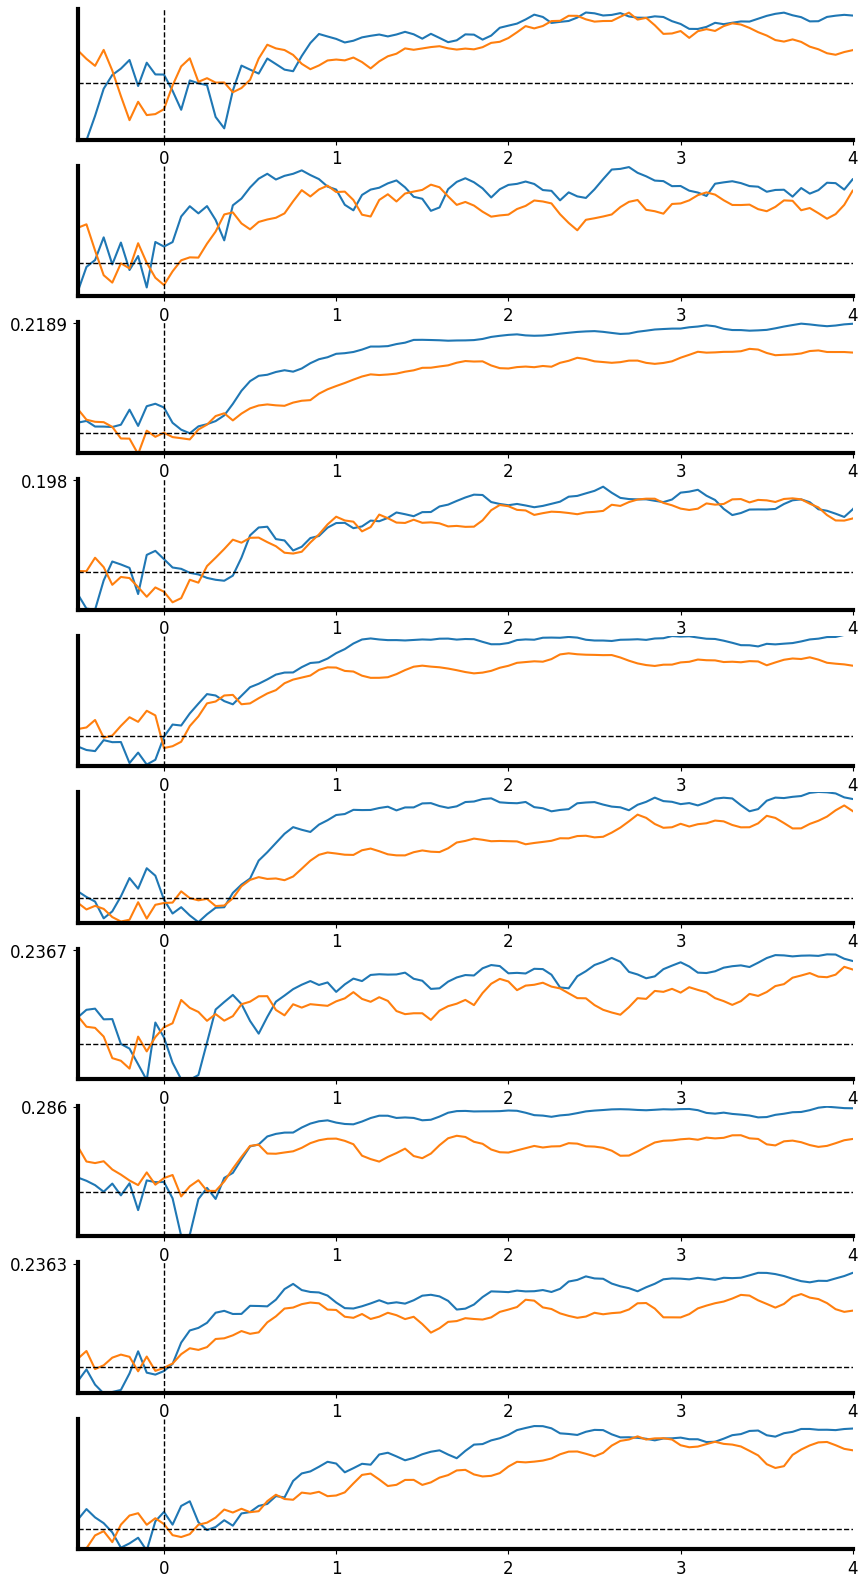

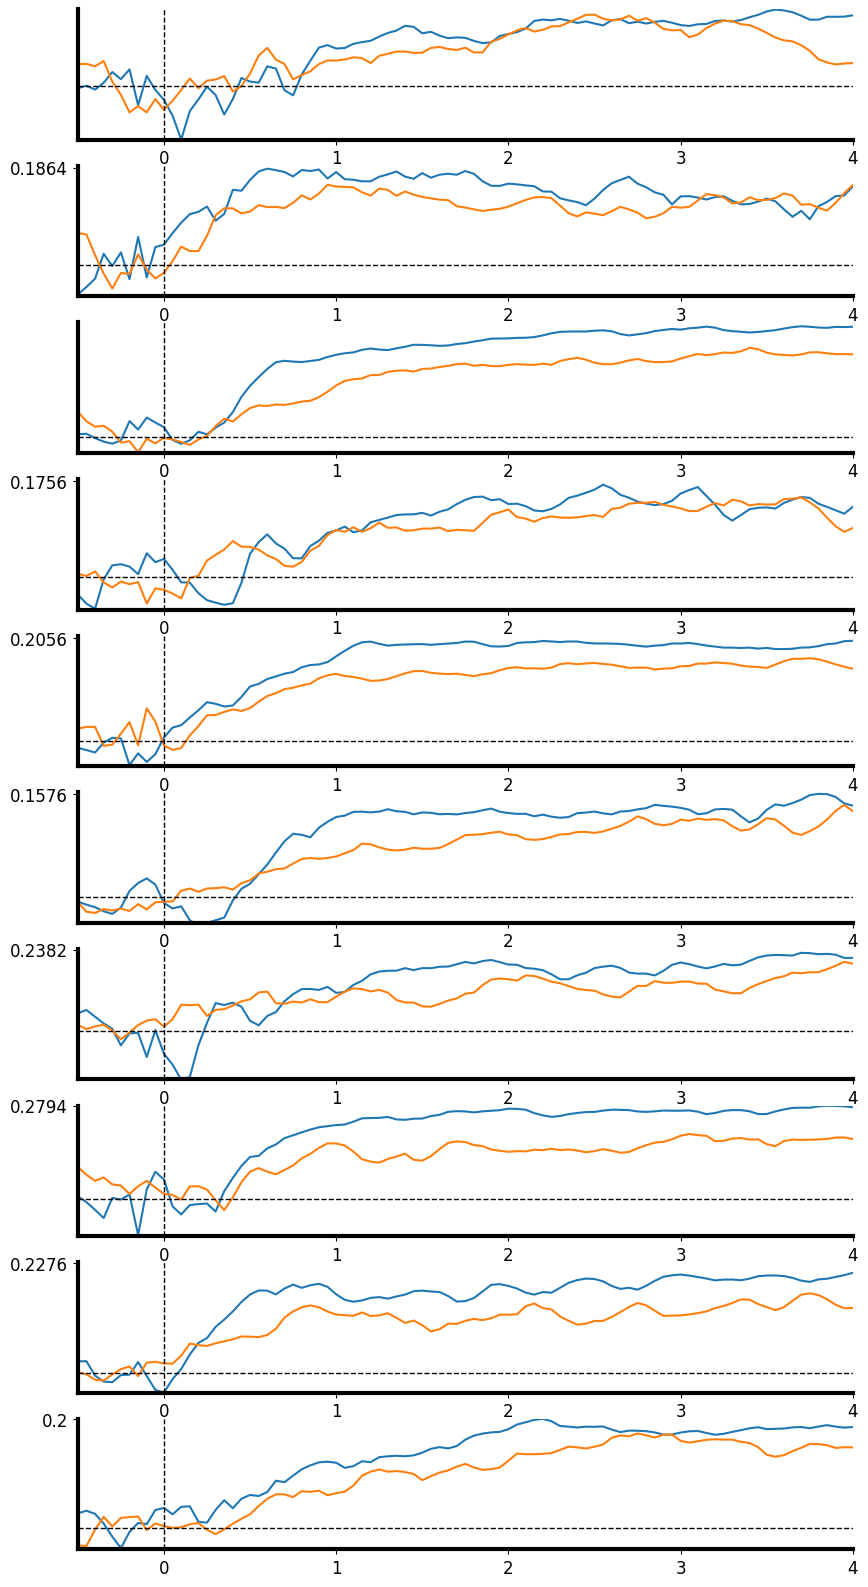

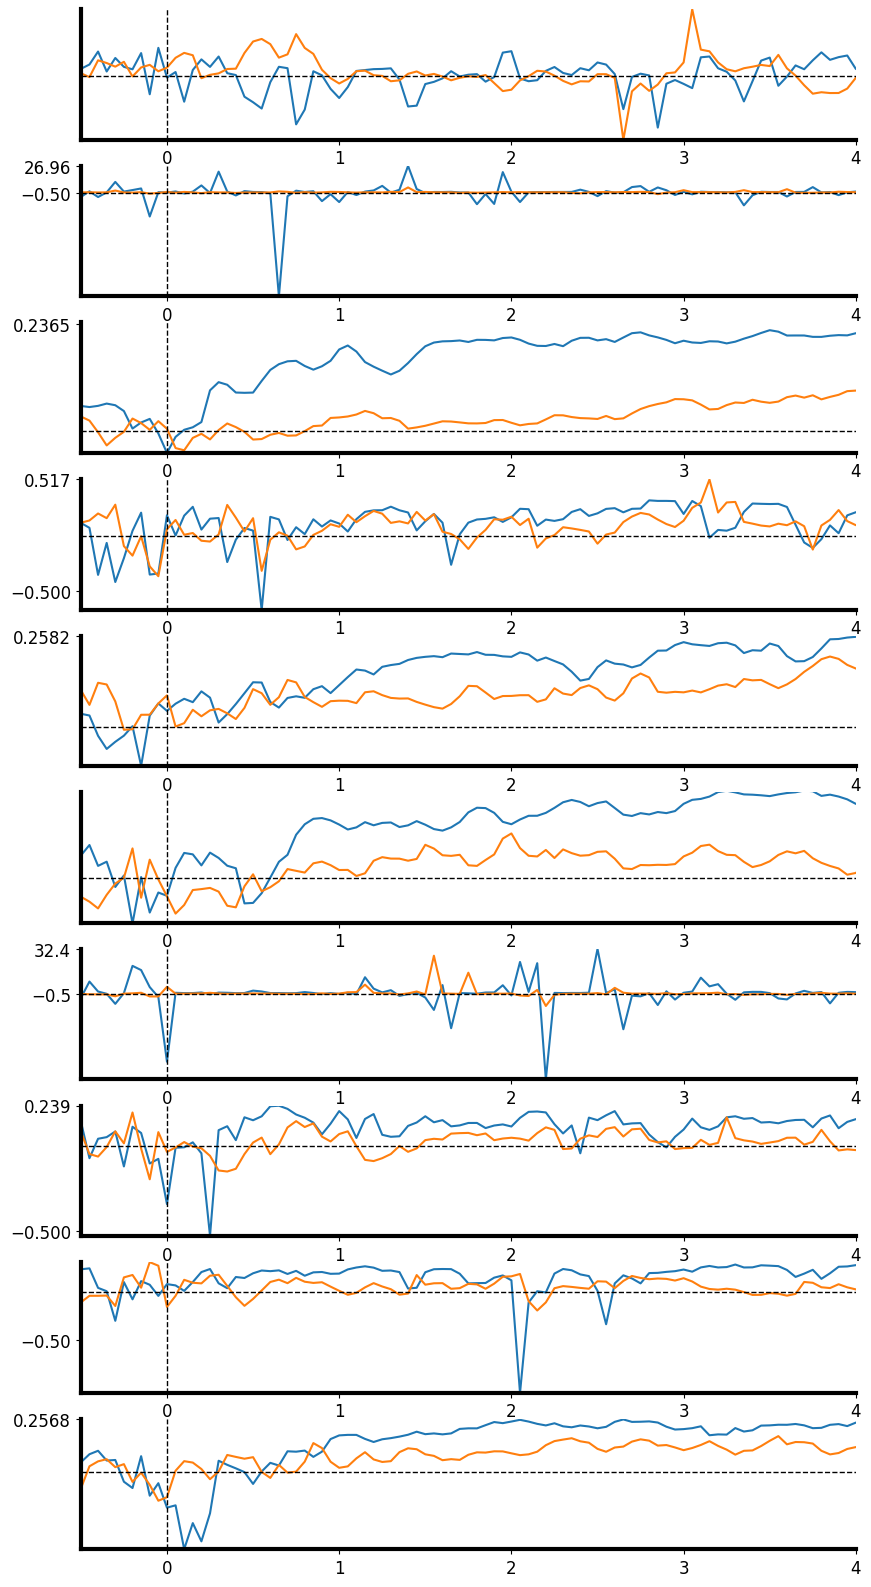

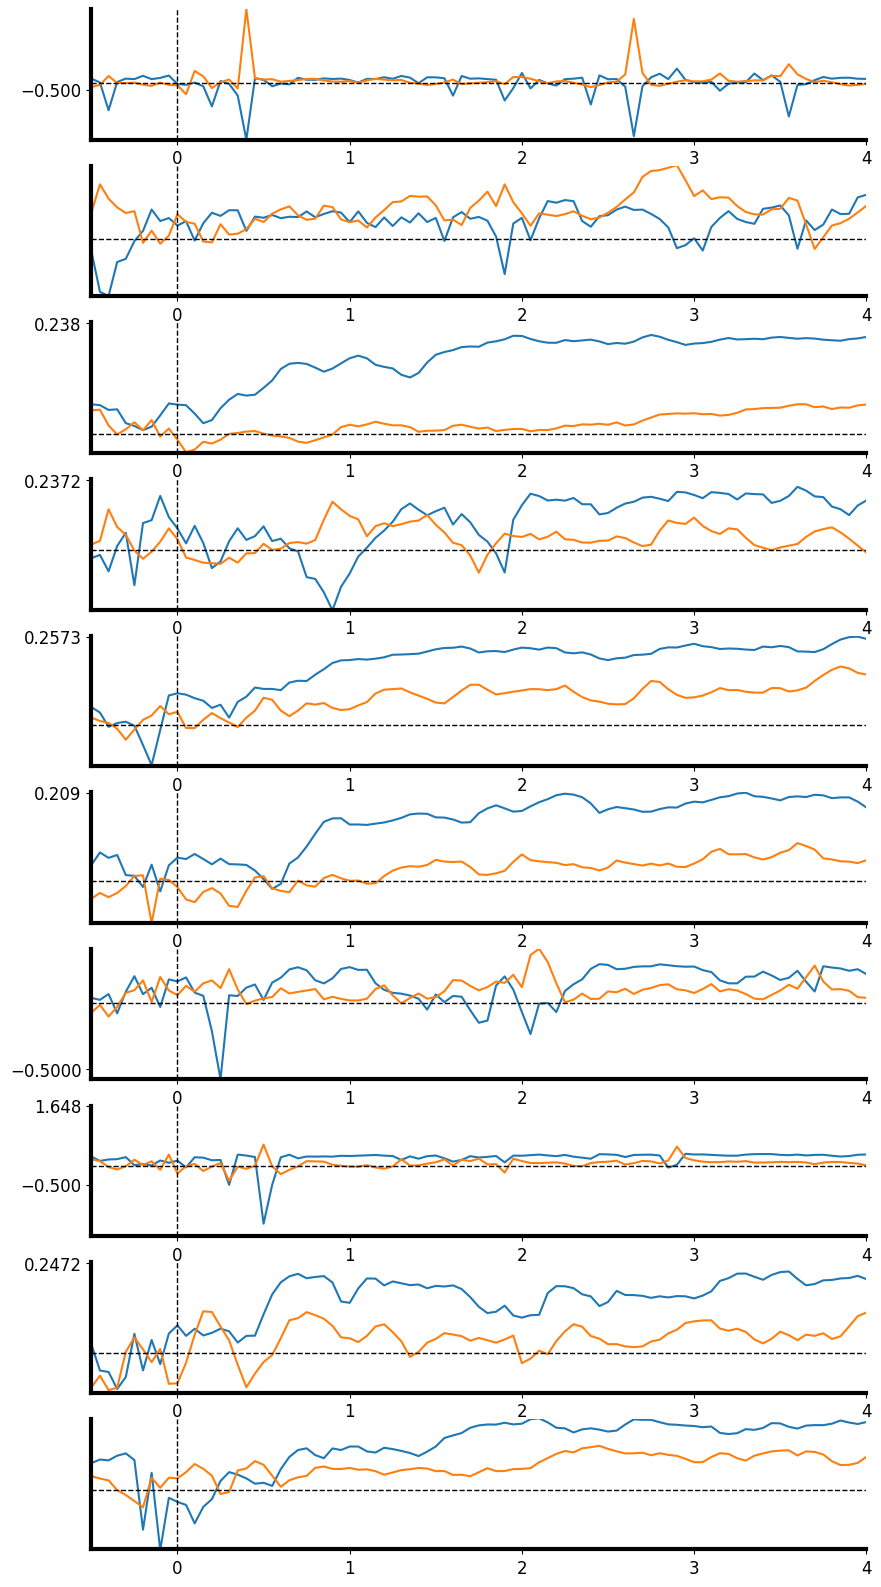

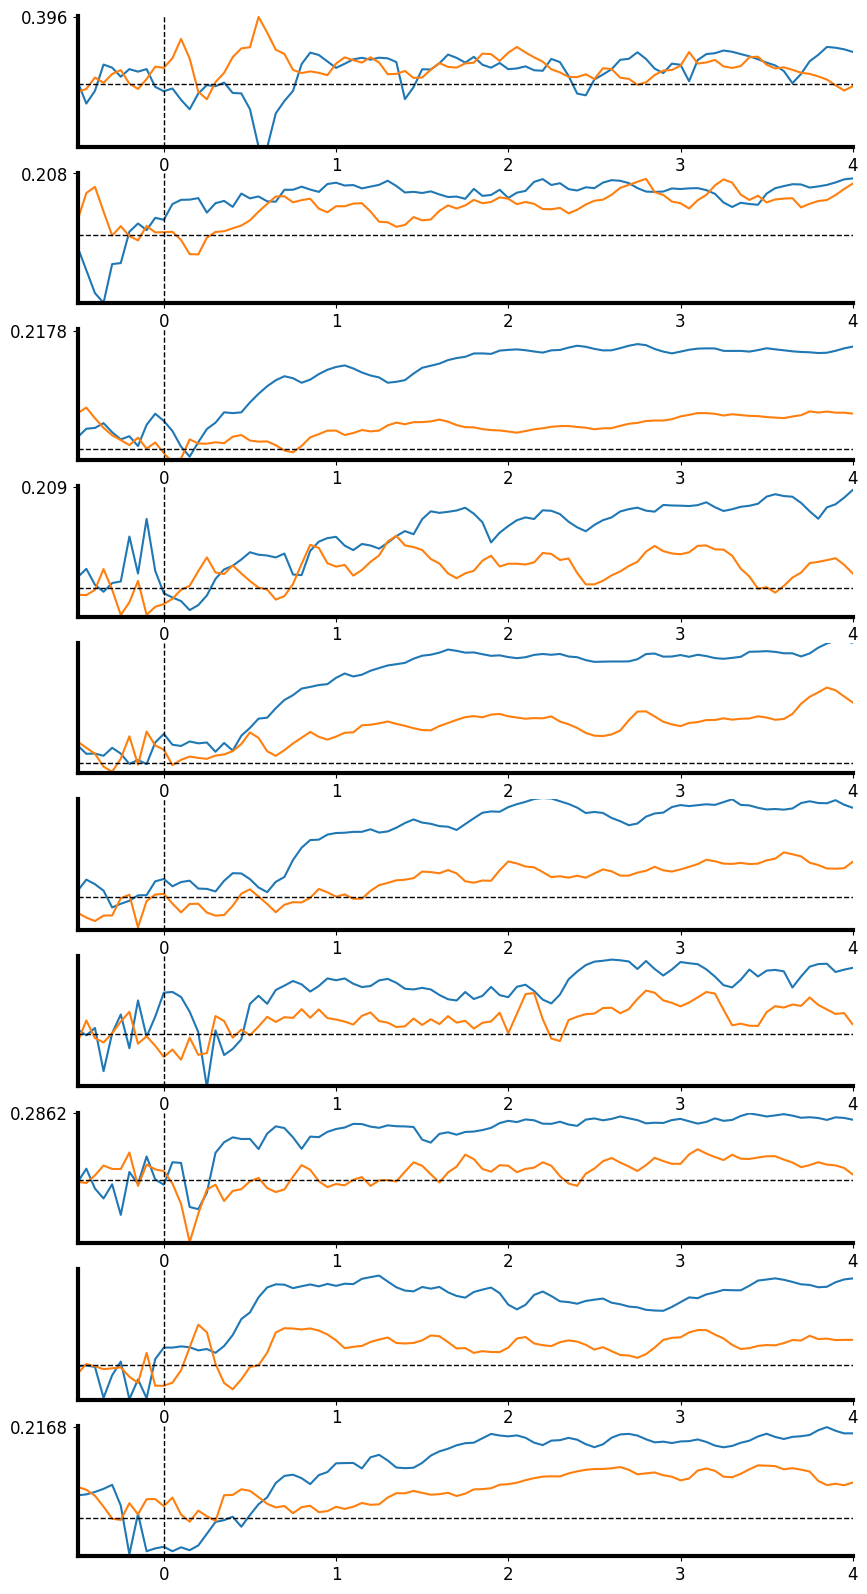

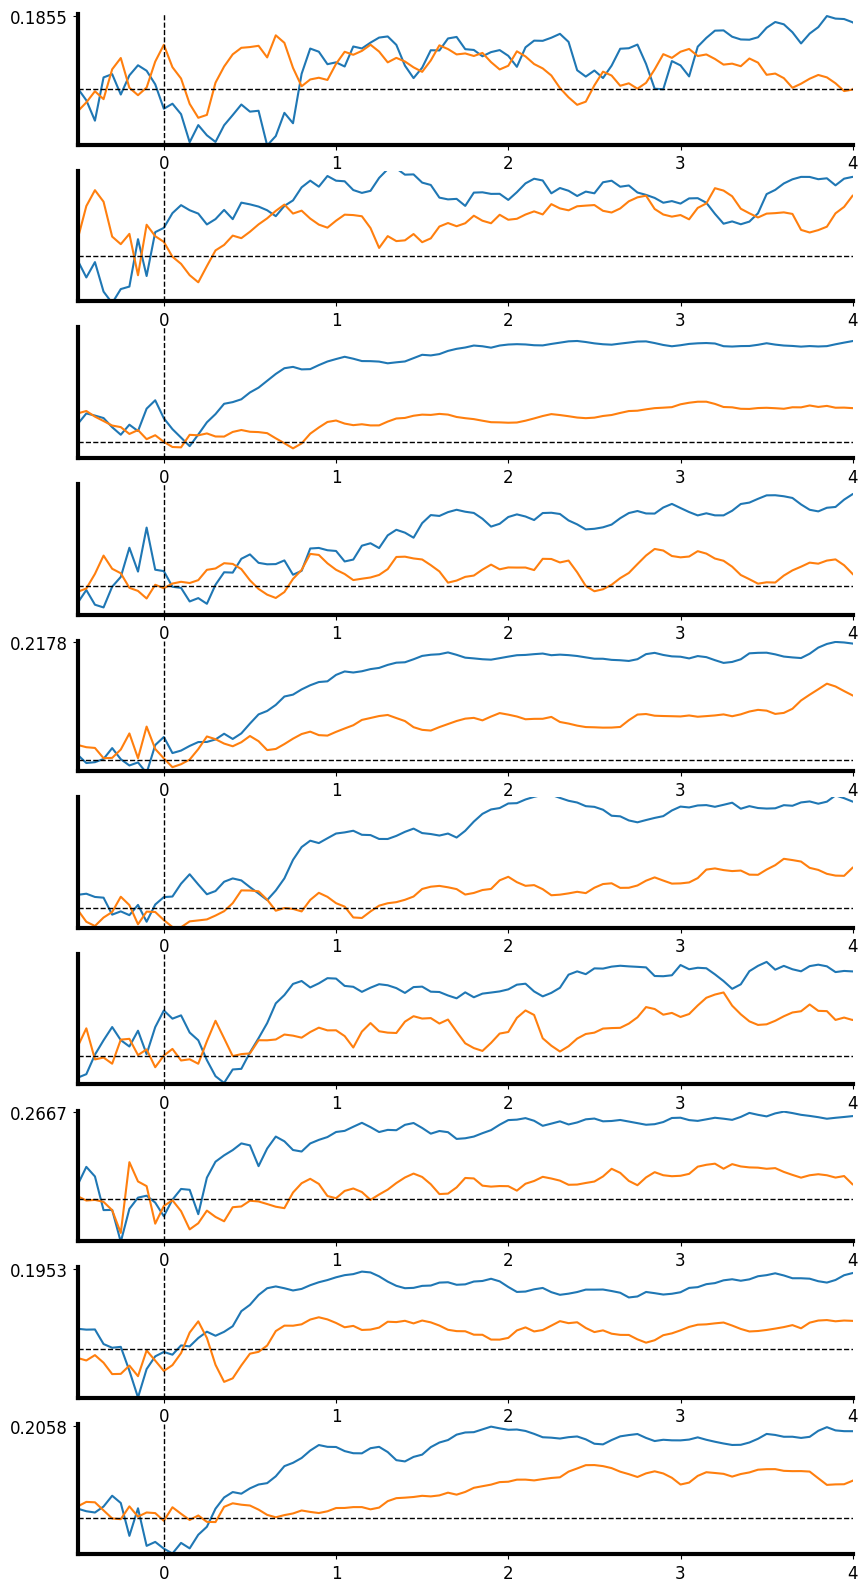

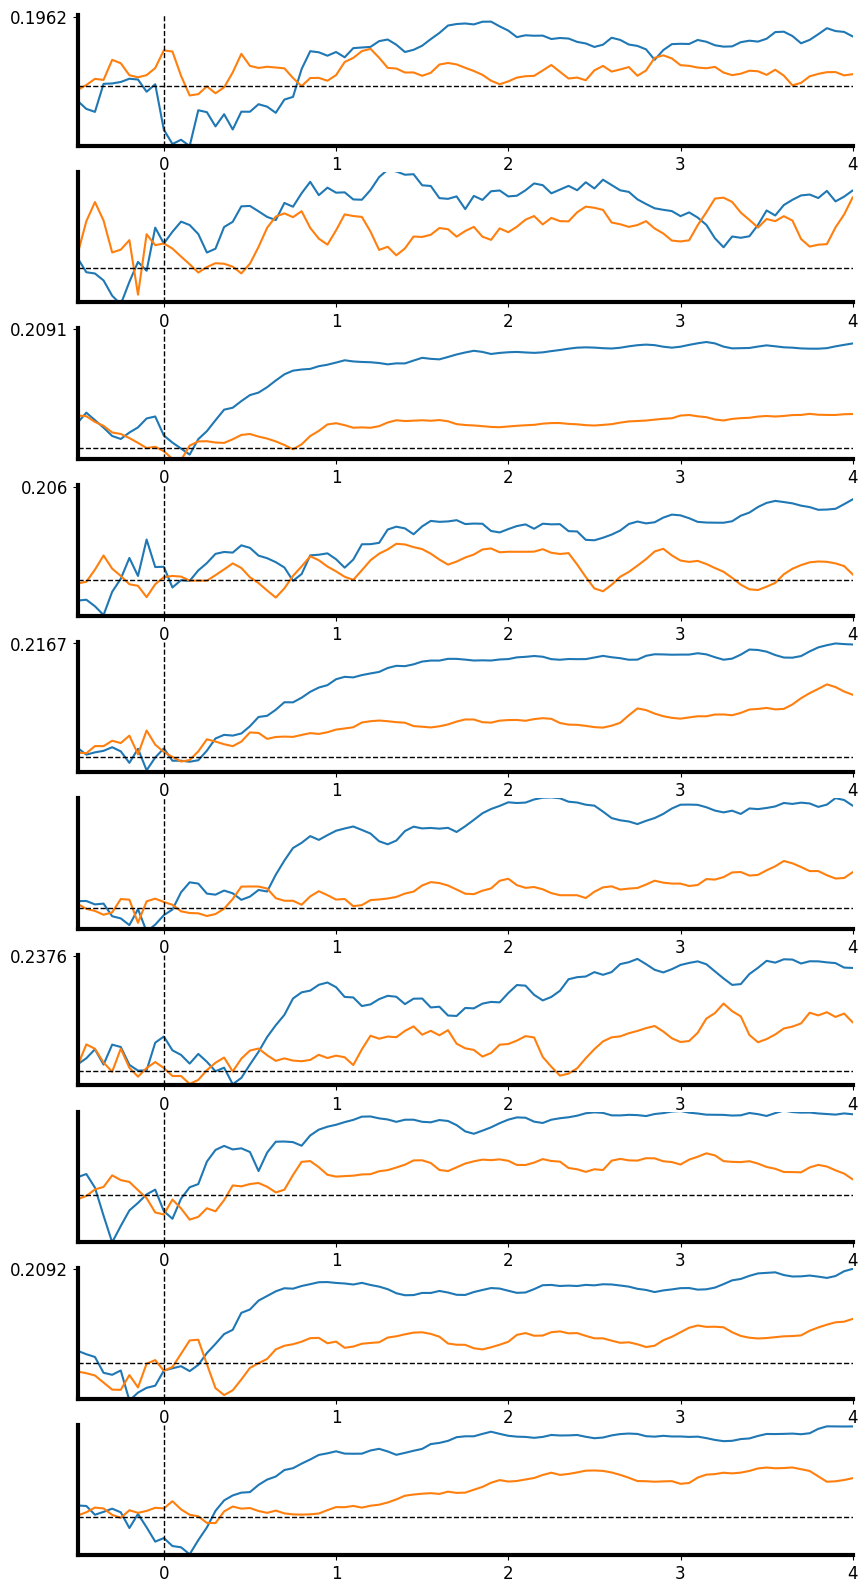

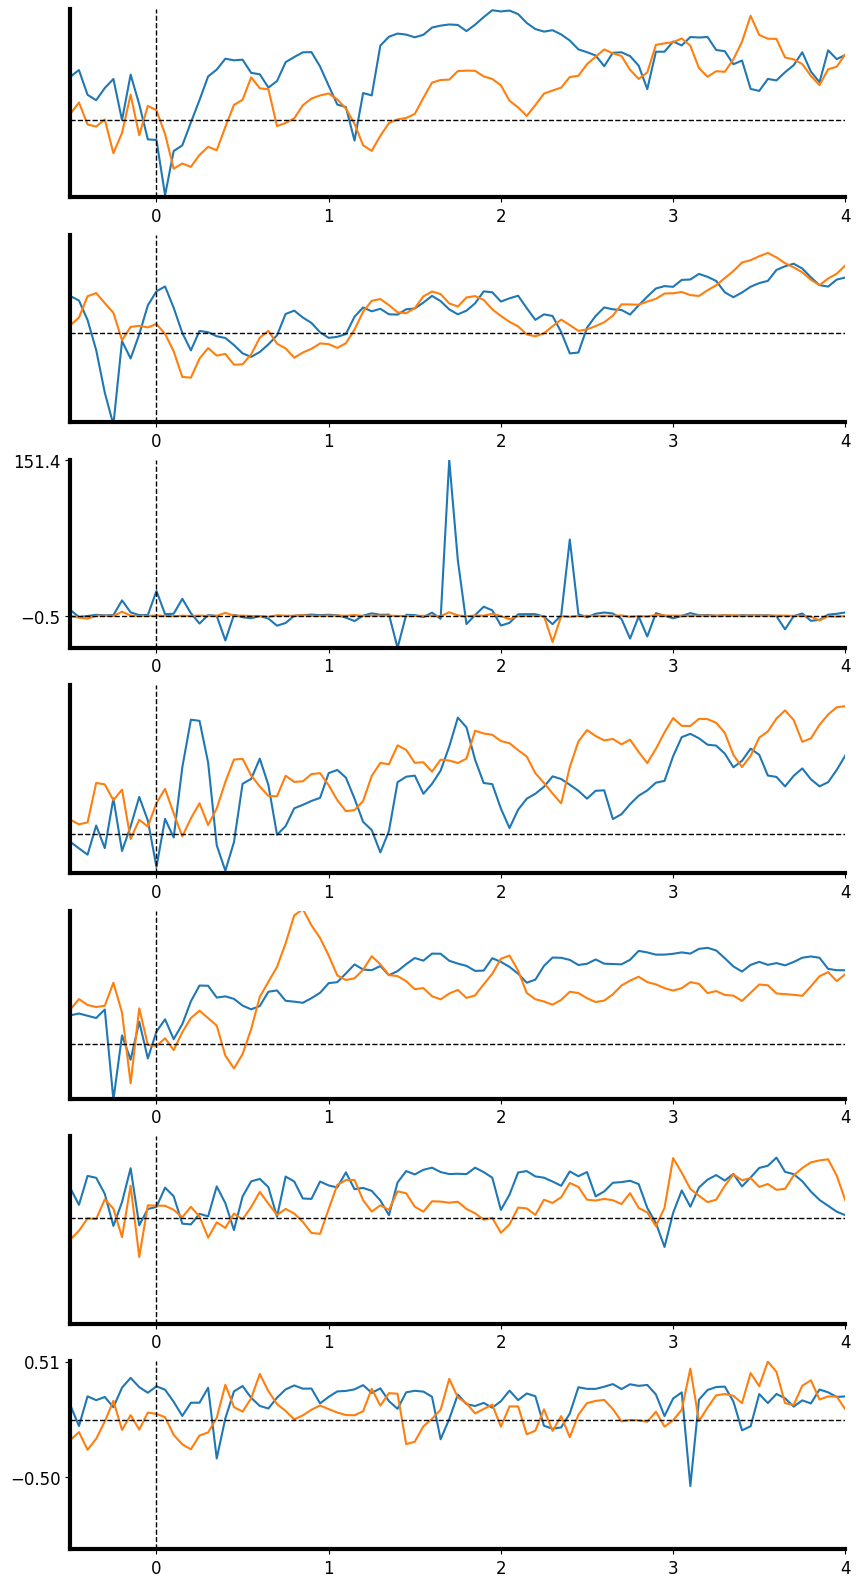

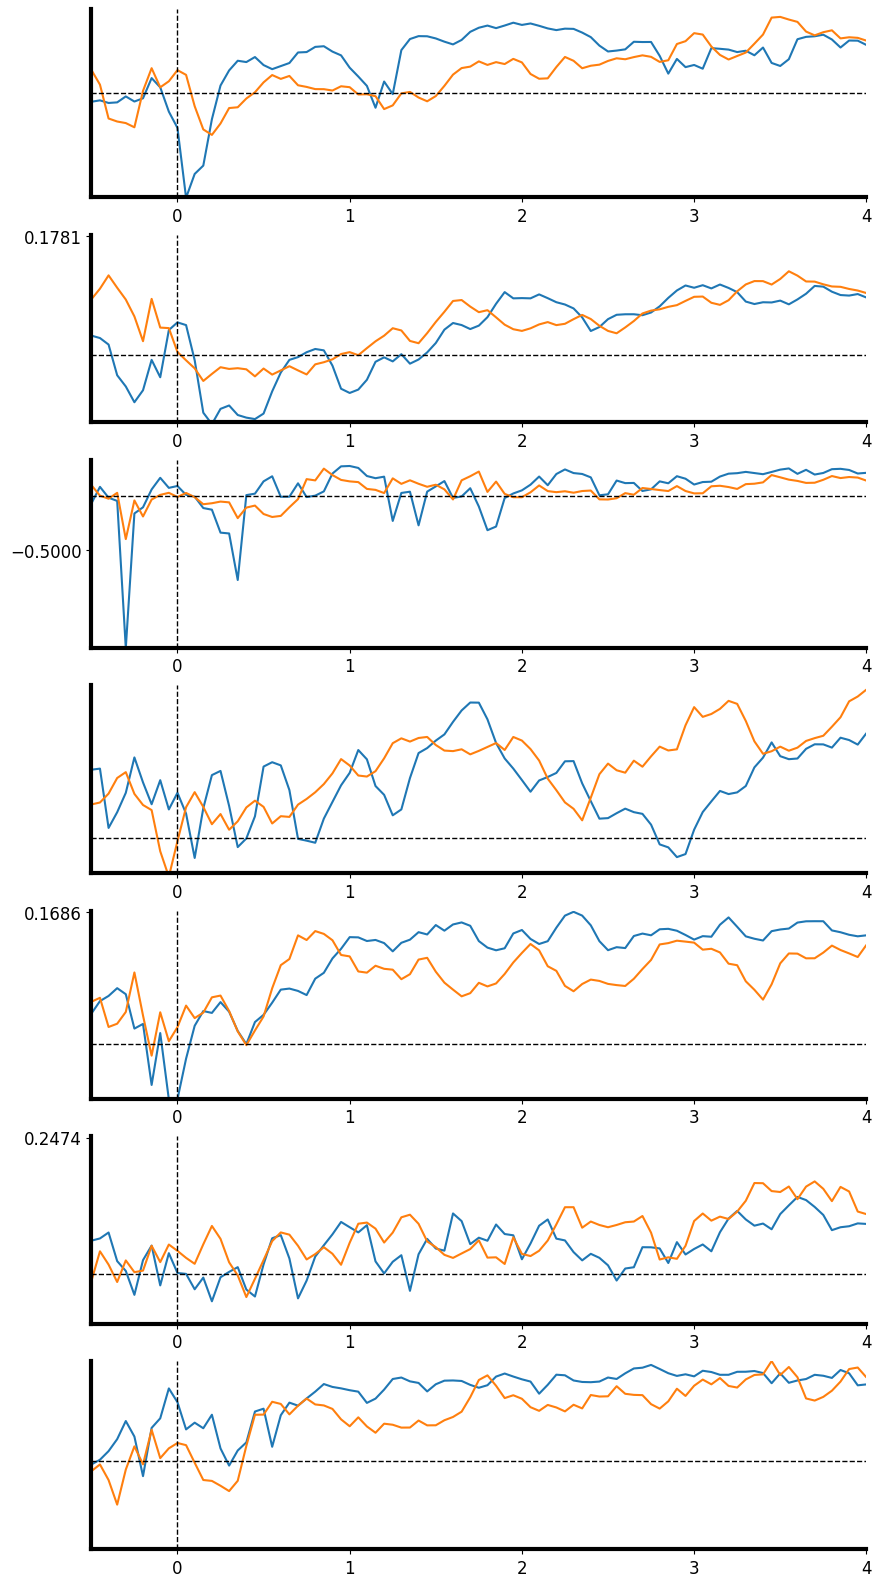

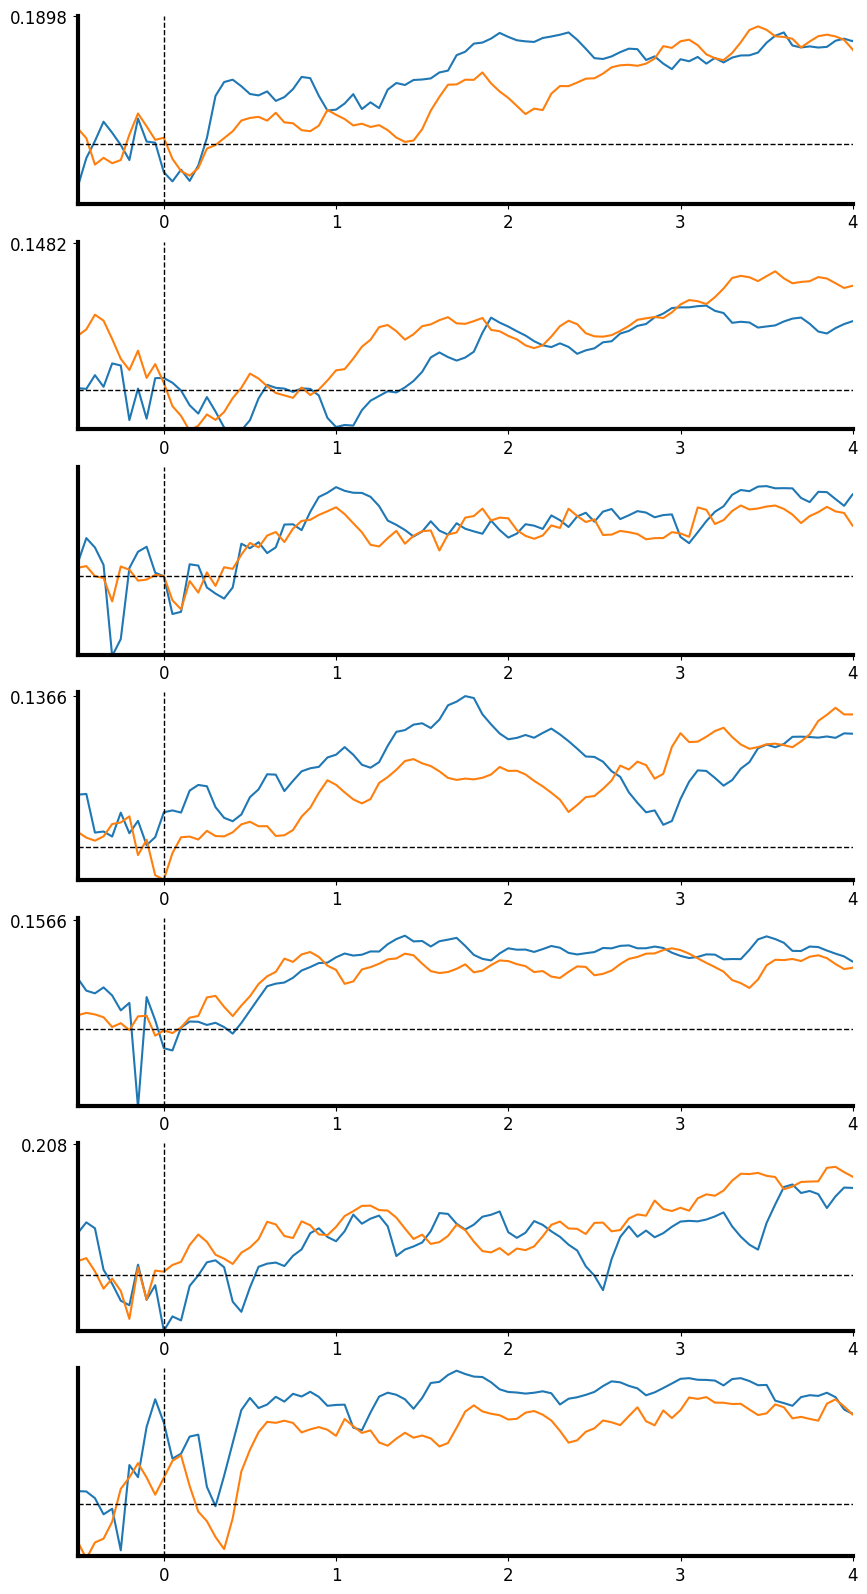

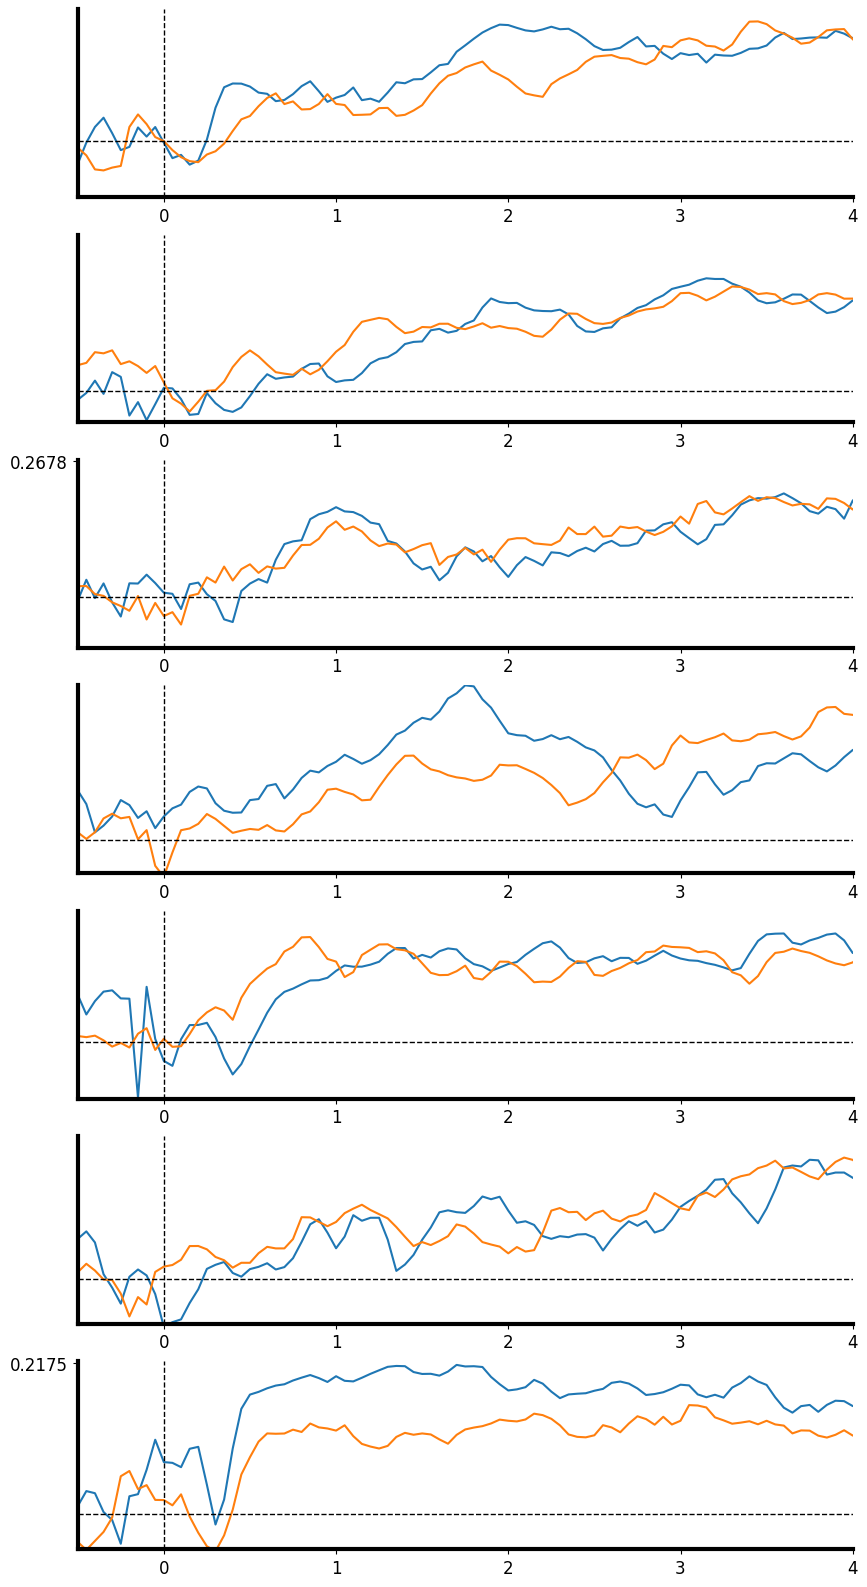

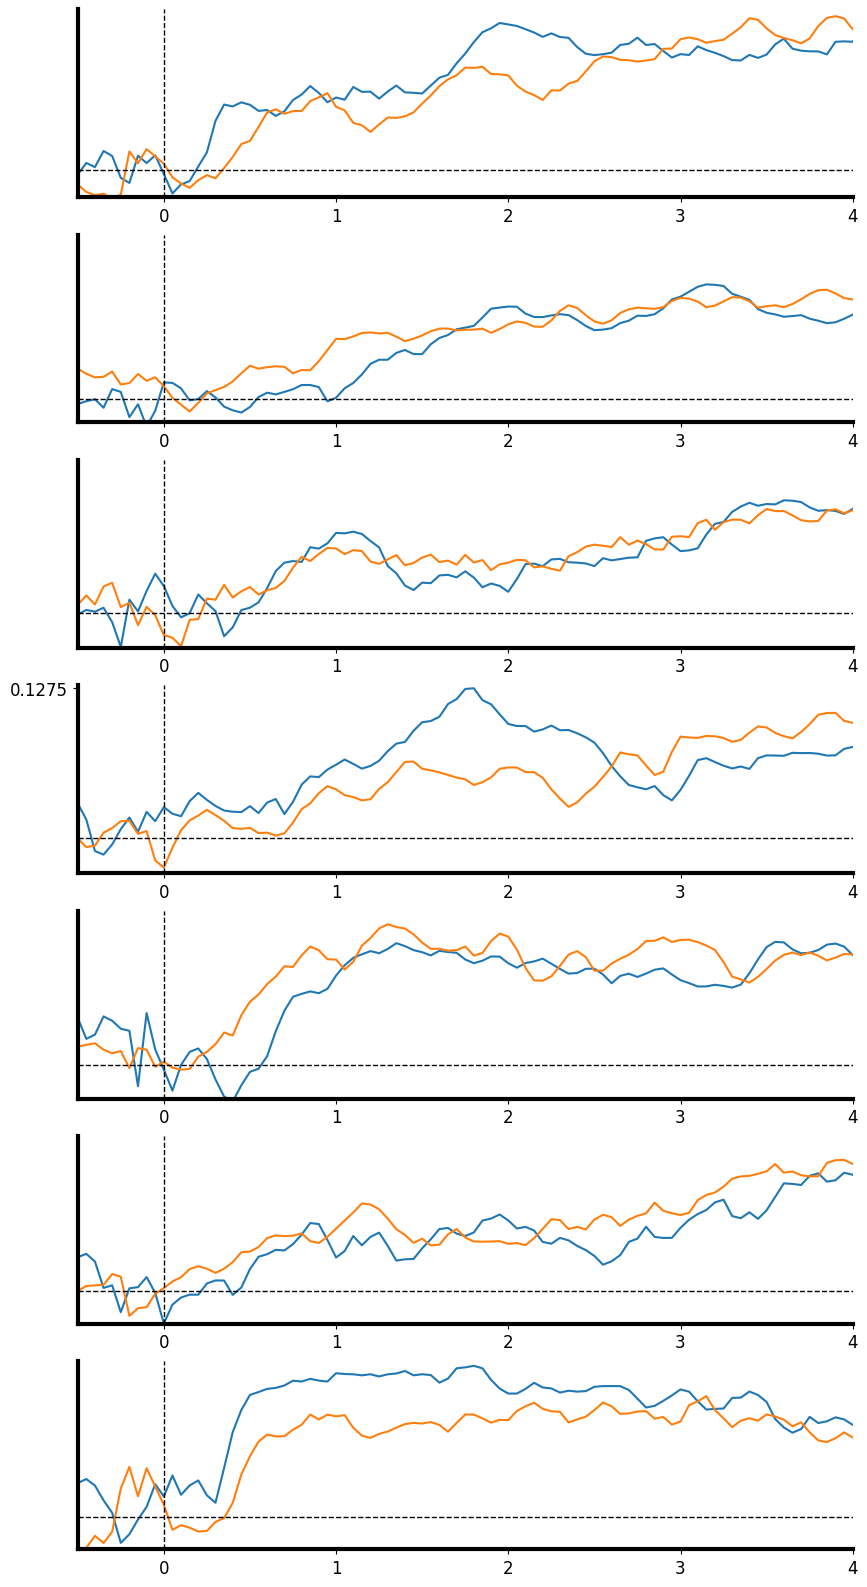

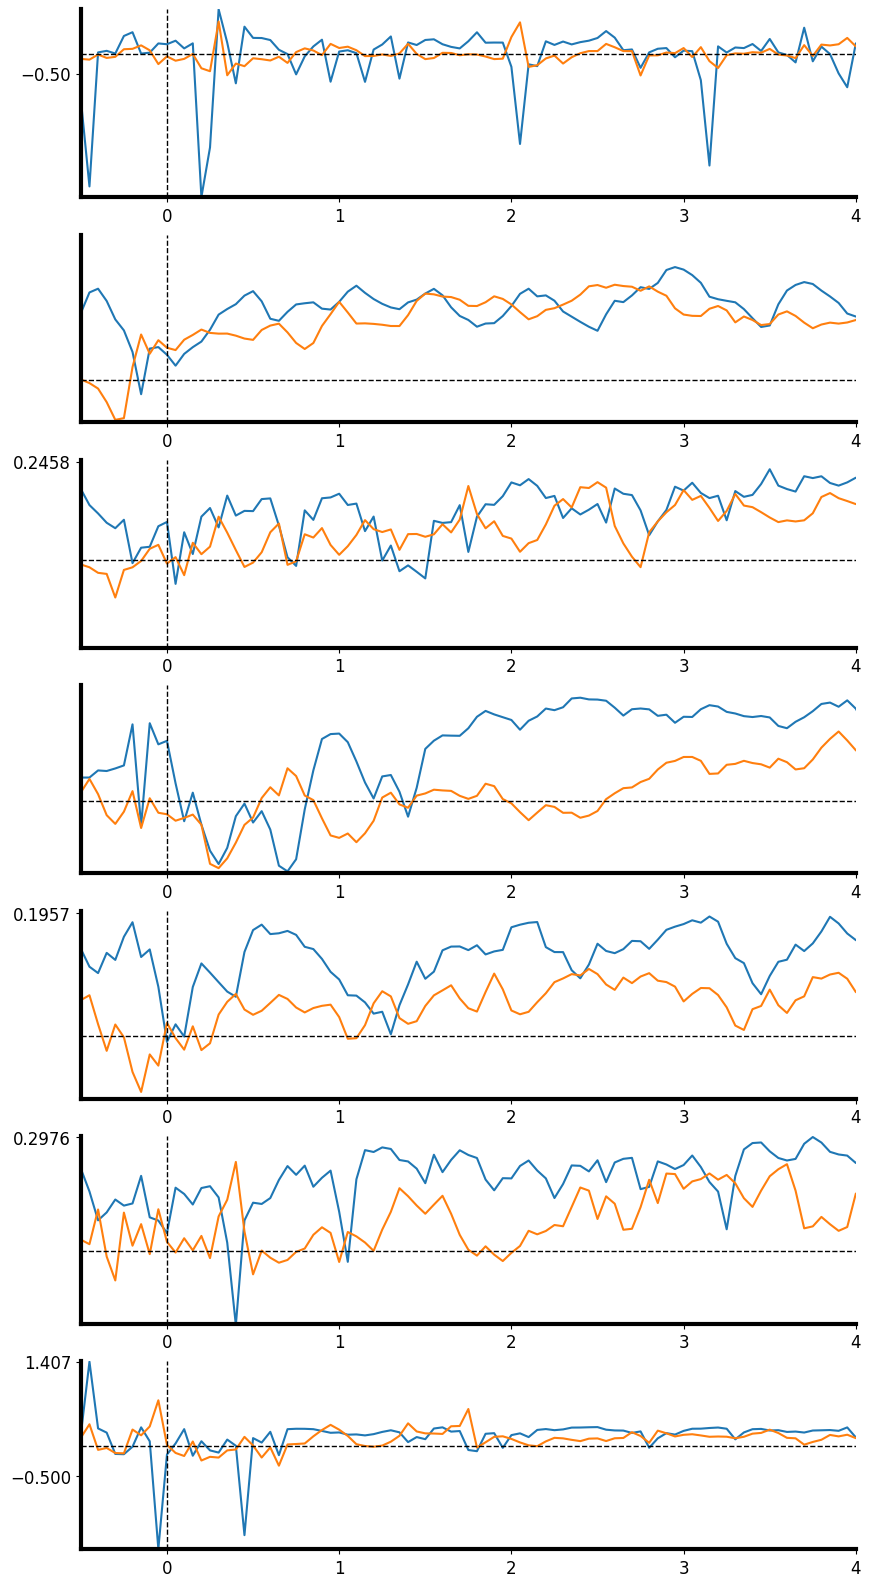

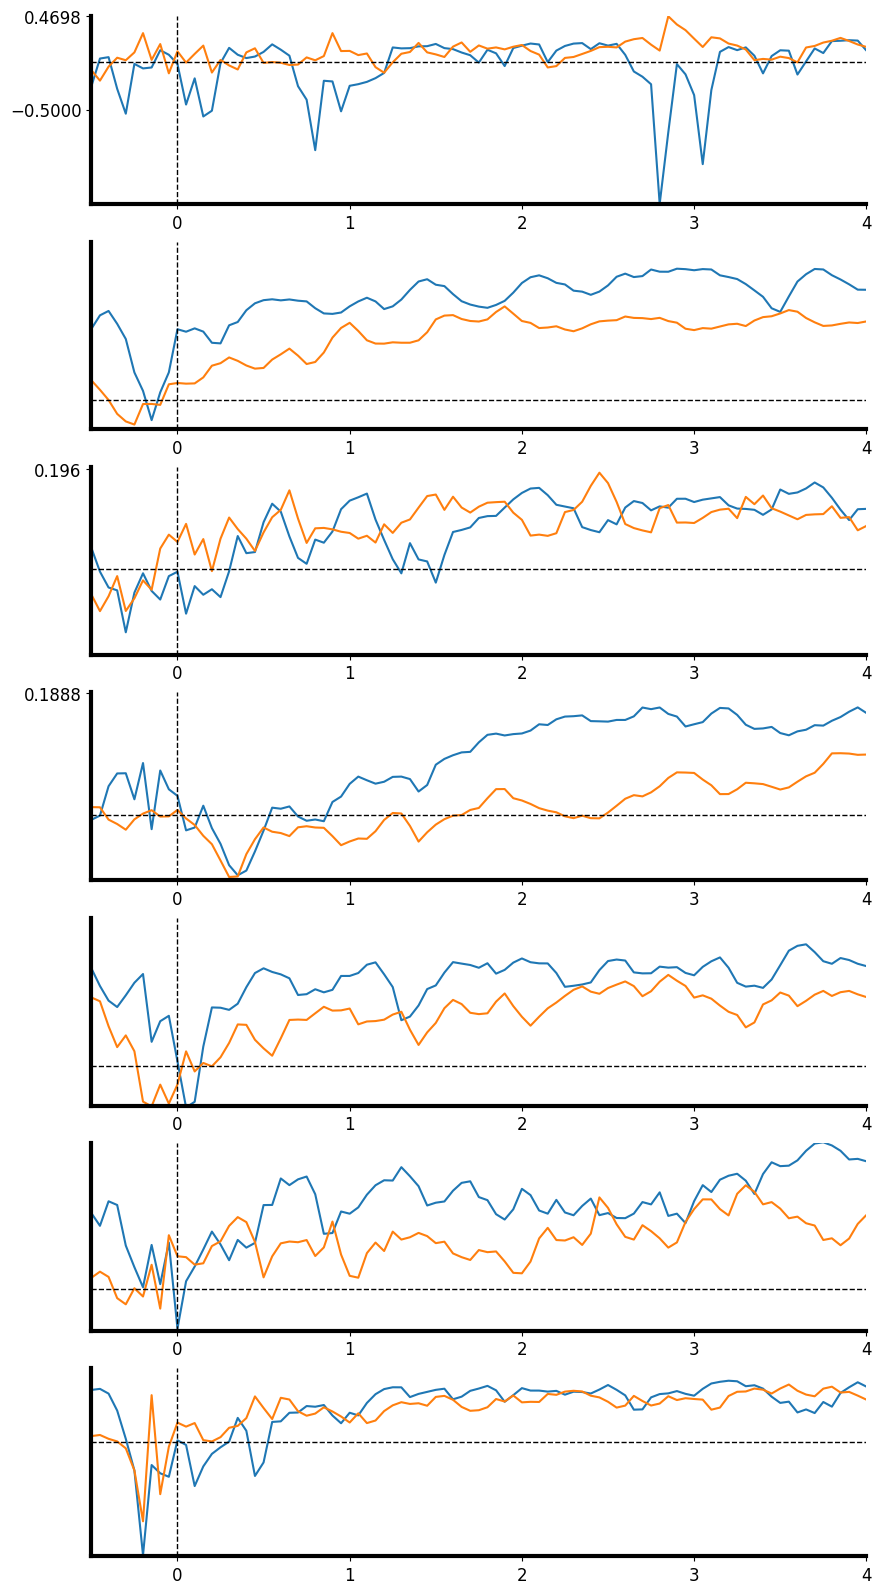

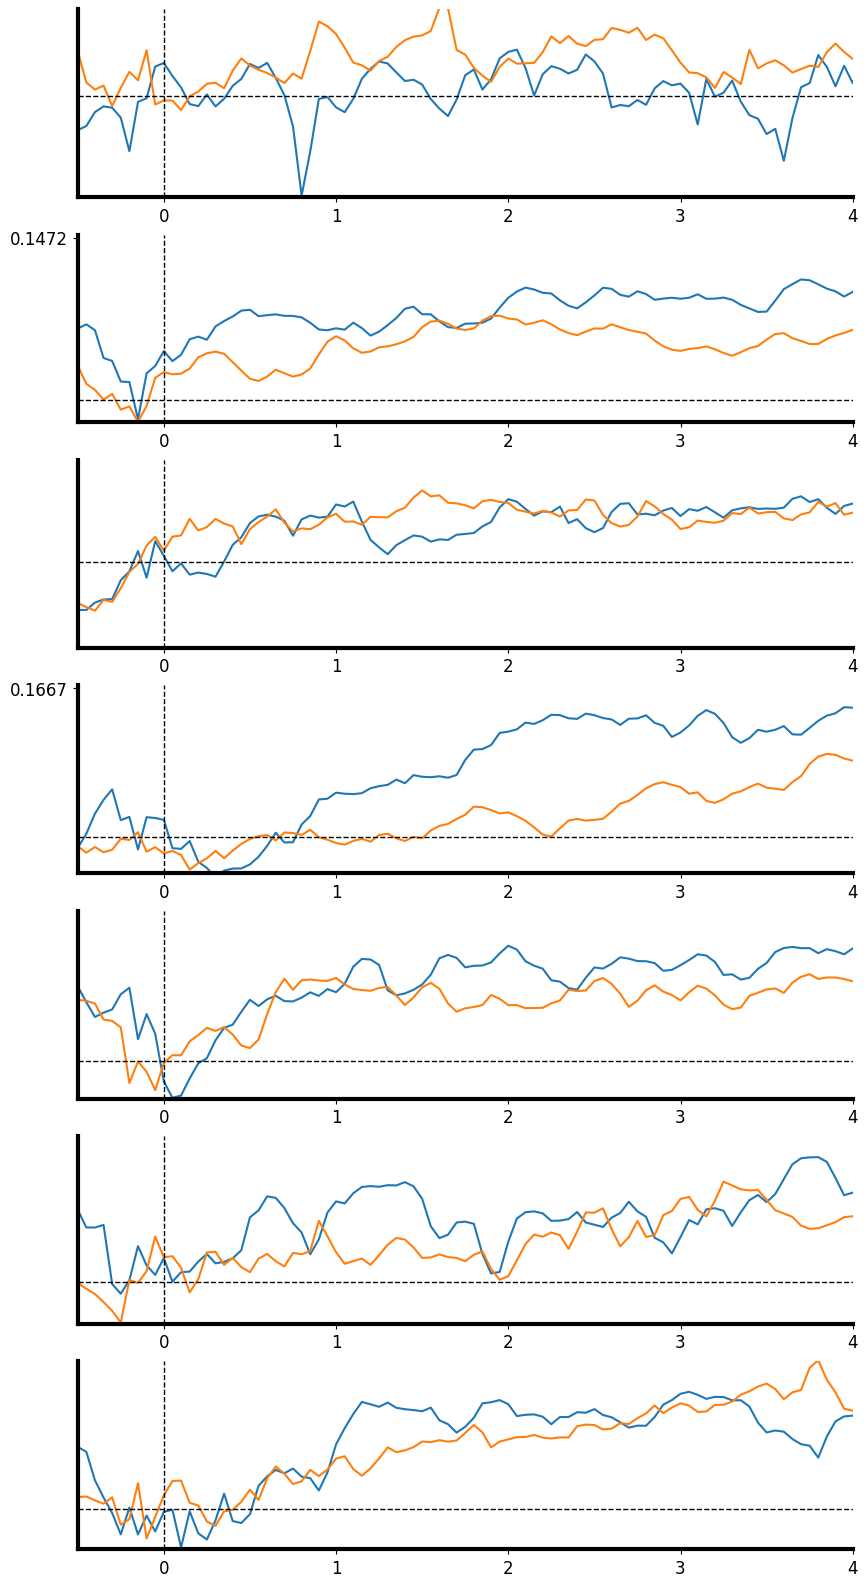

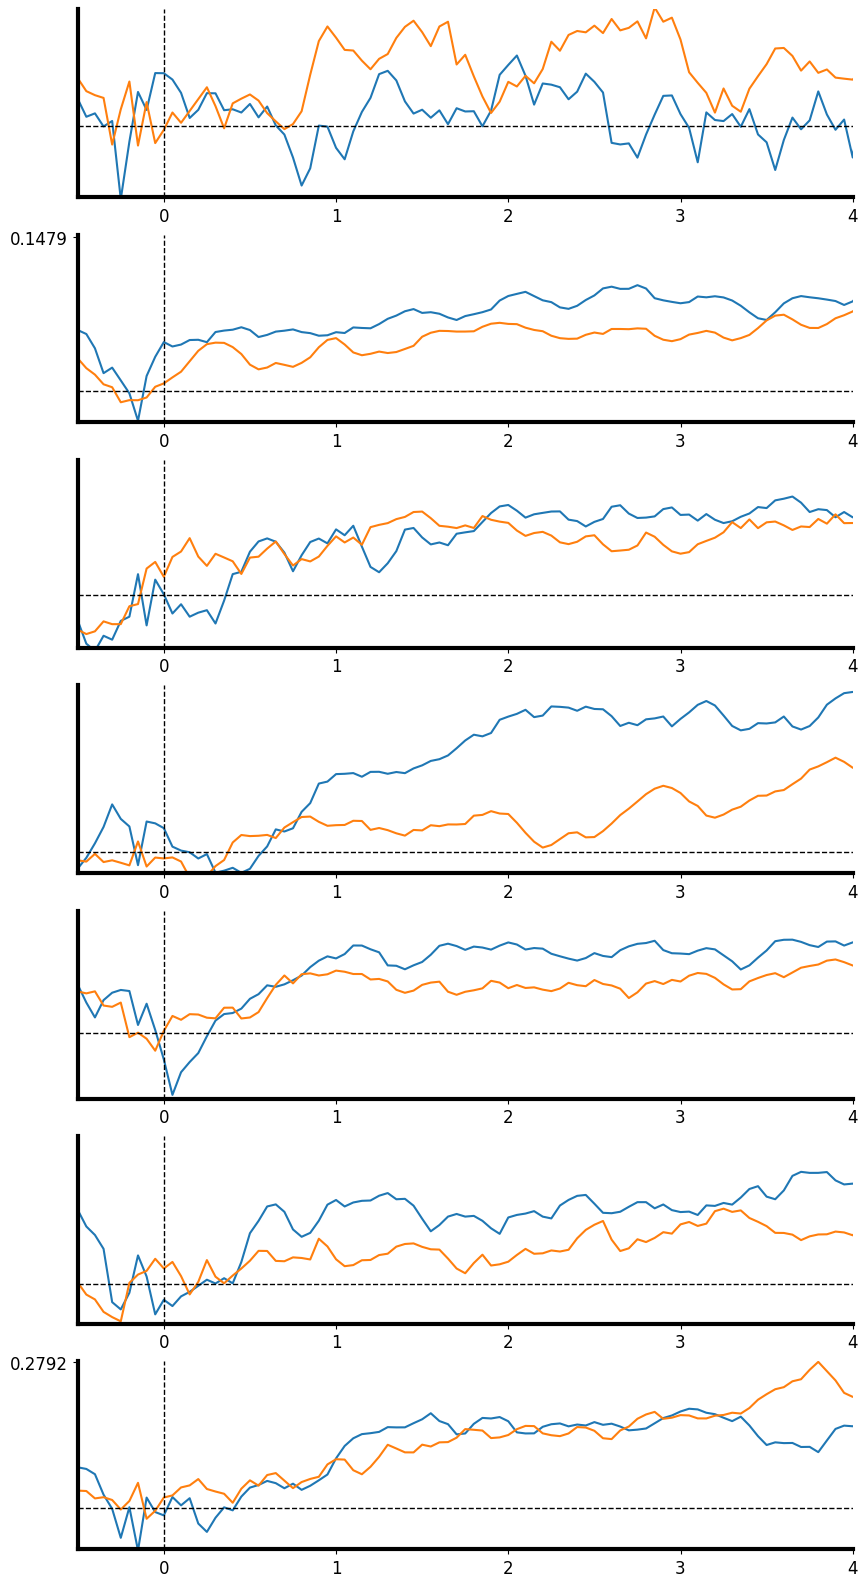

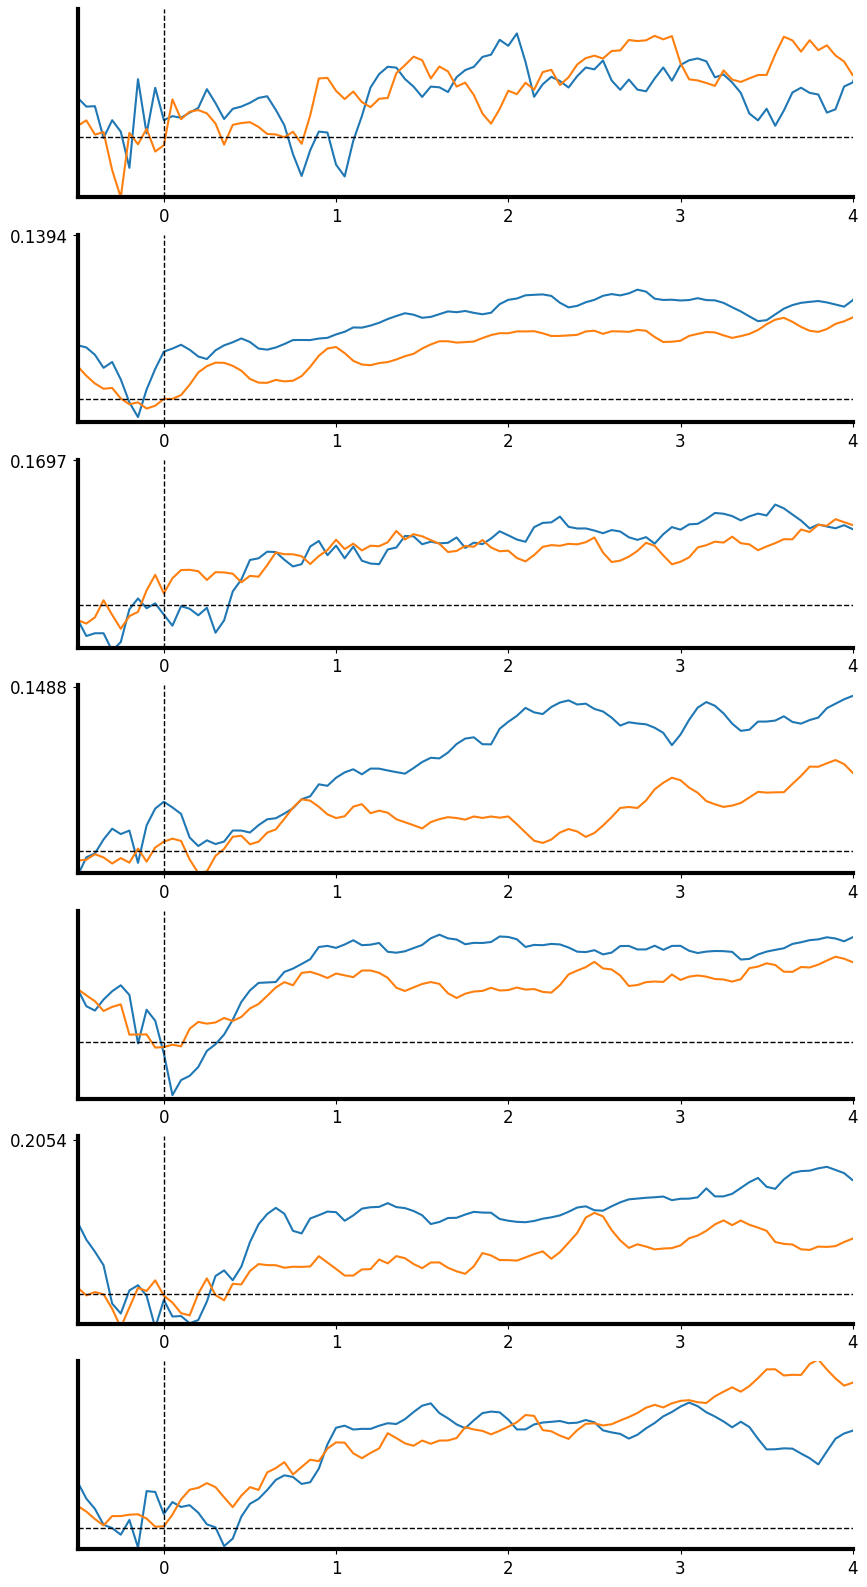

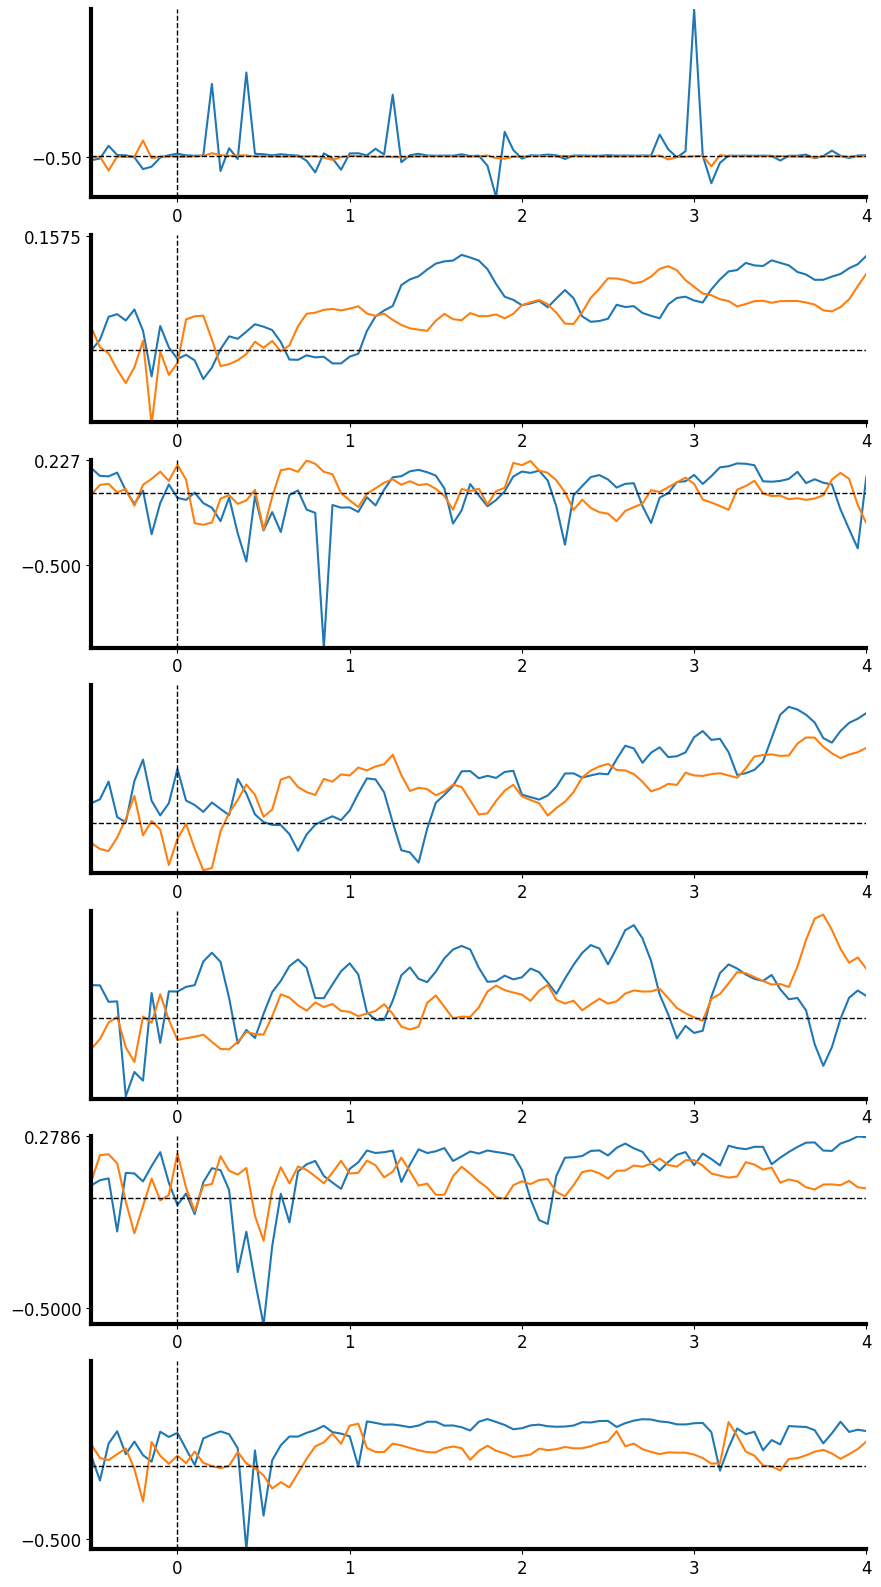

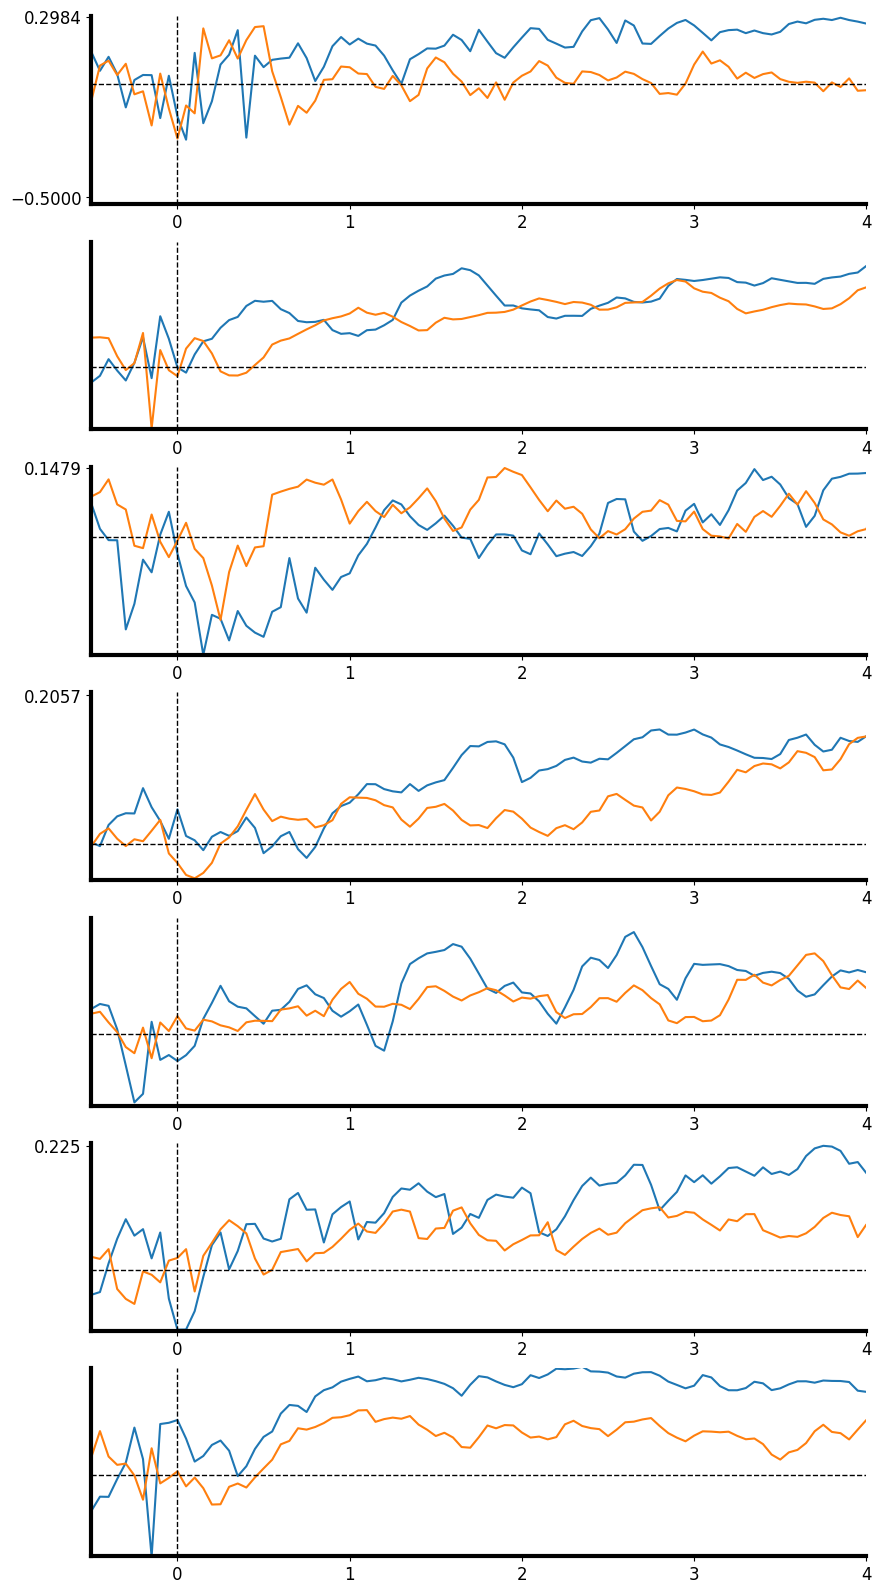

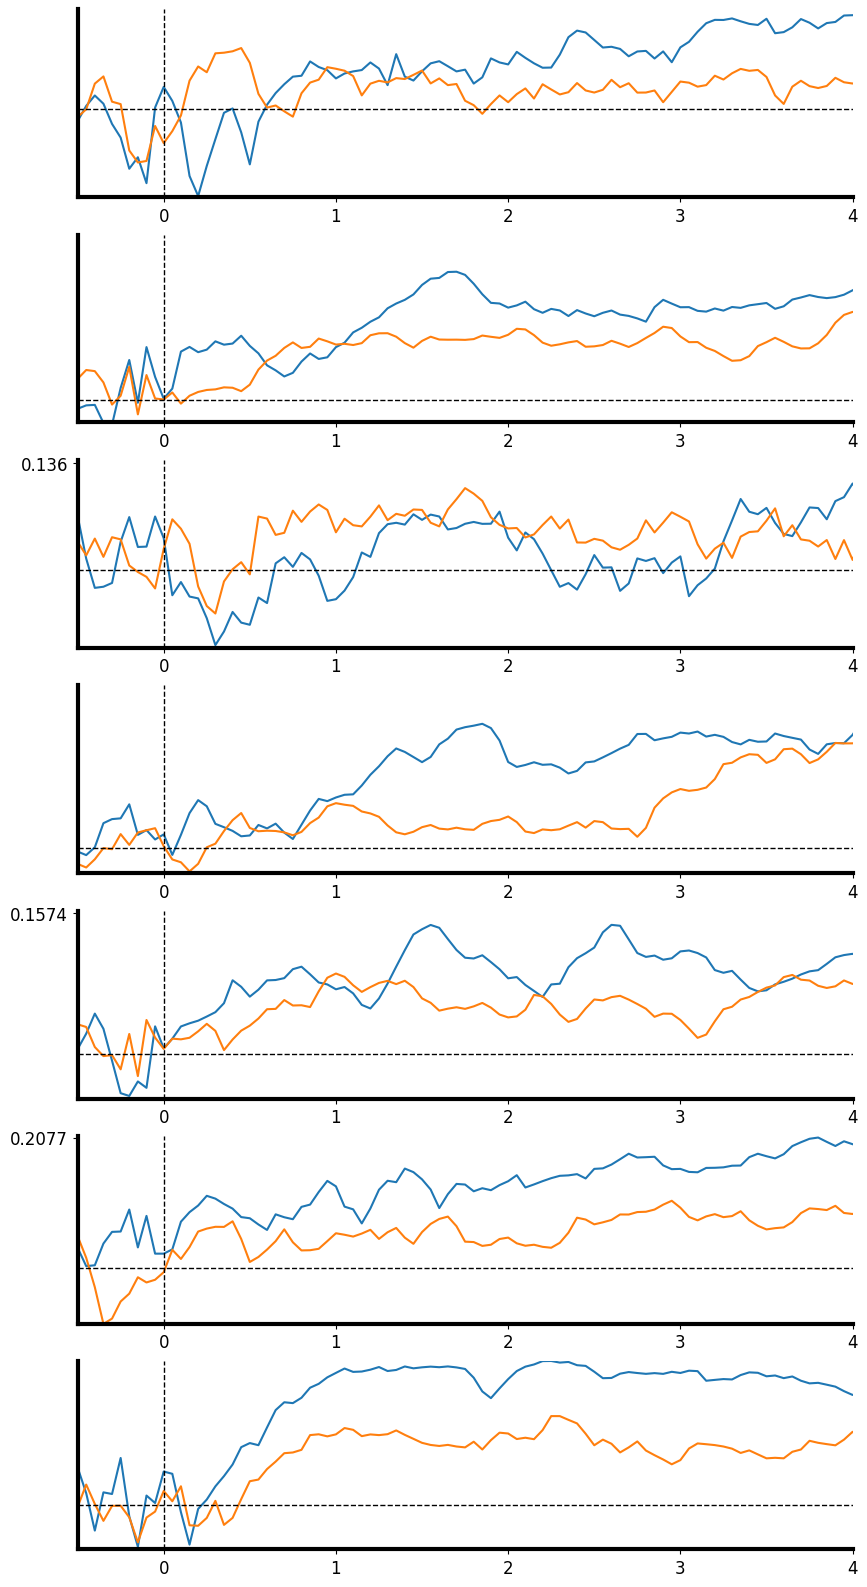

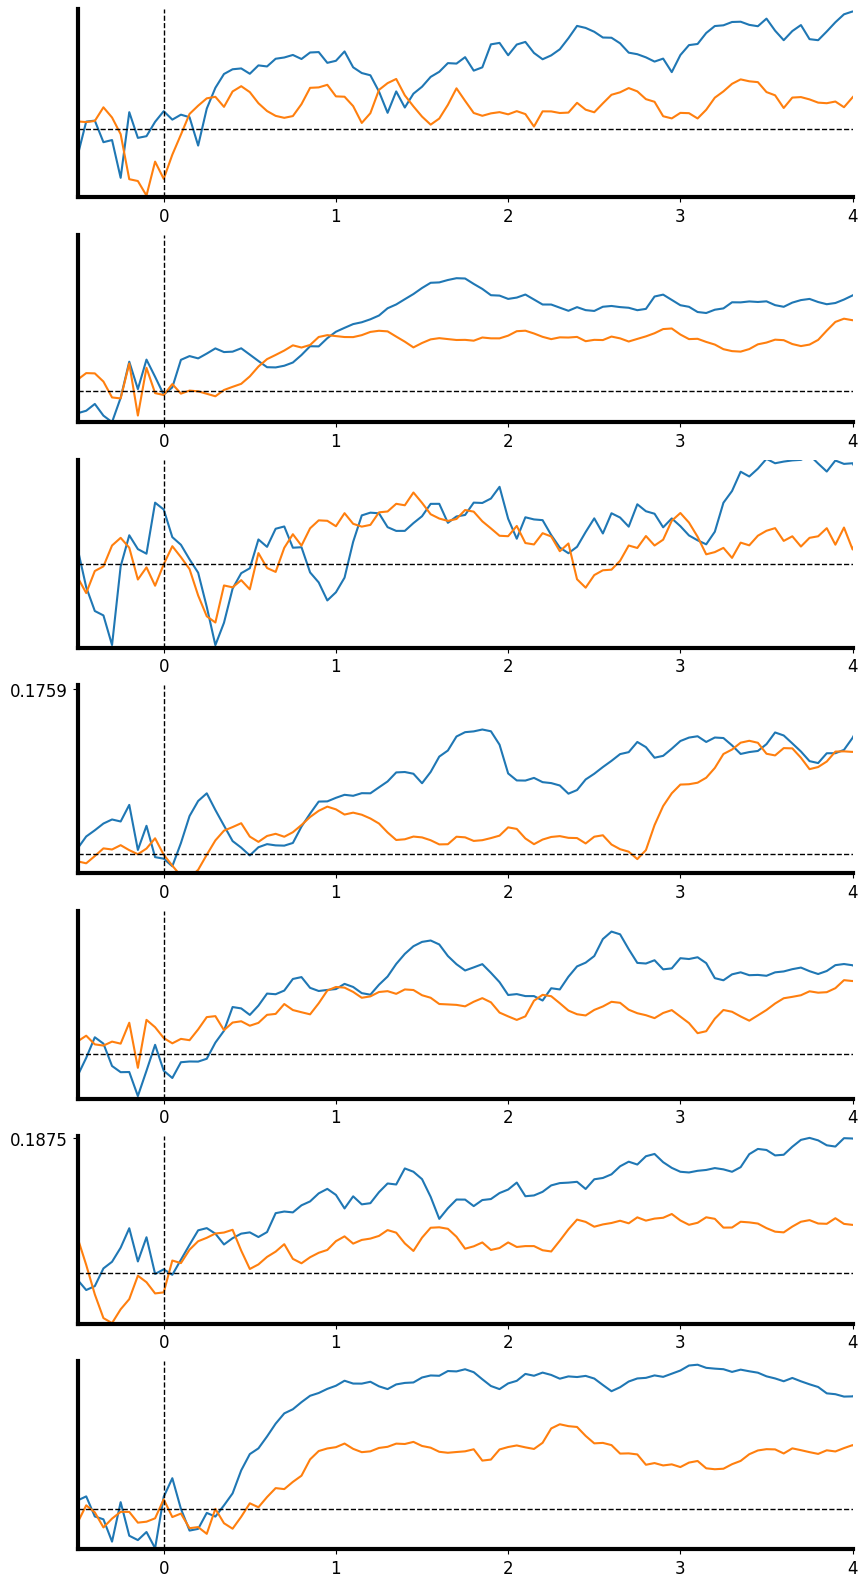

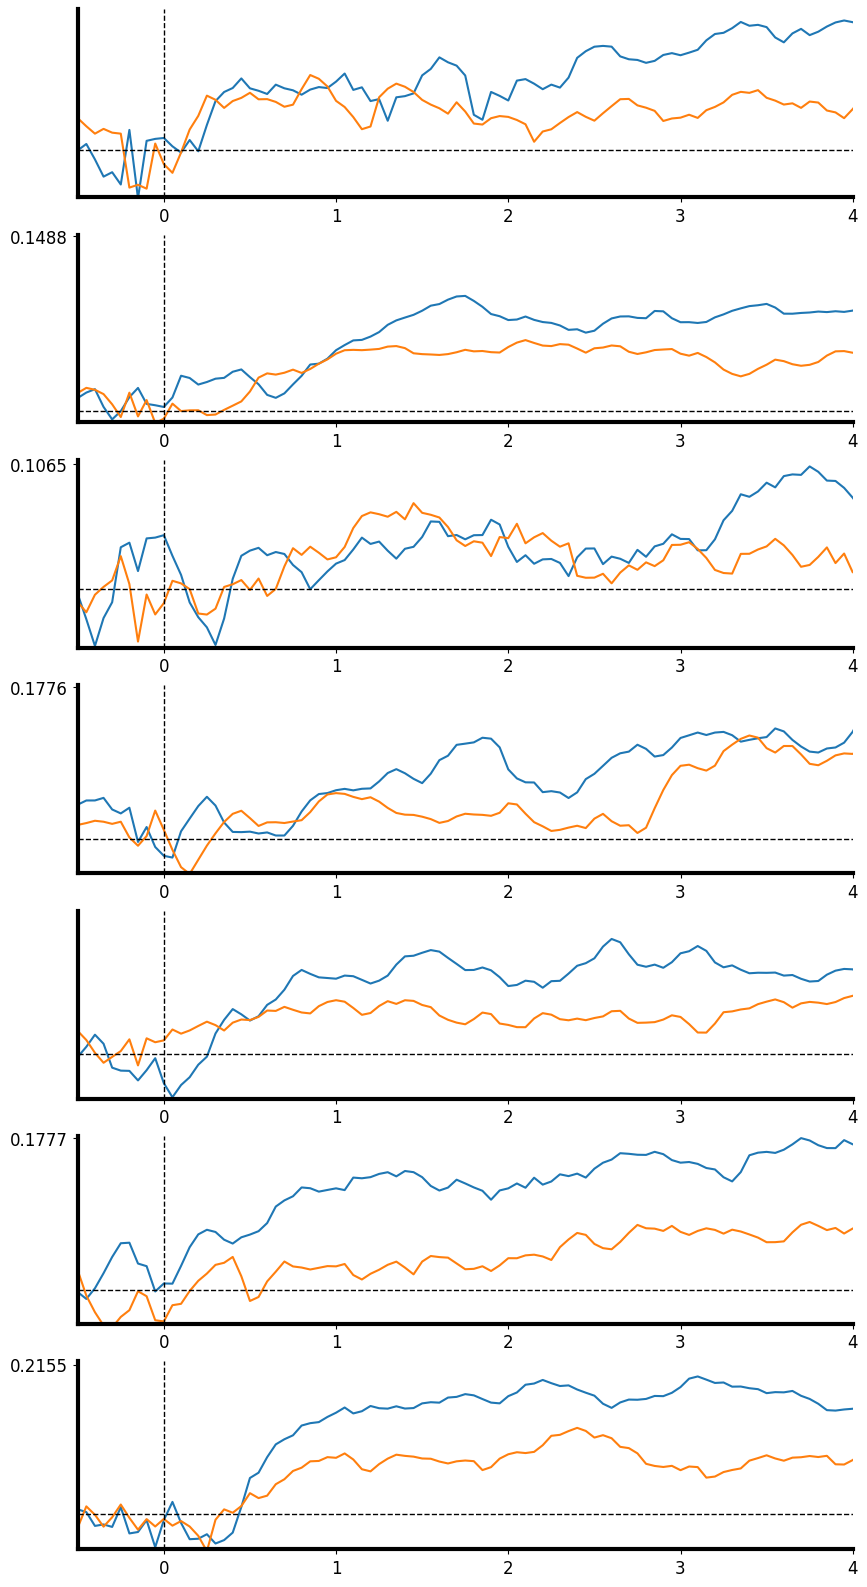

In [77]:
for roi in ROIs:
	os.chdir(roi)
	for percent in percents:
		os.chdir(str(percent))

		slopes=np.load('slopes.npy')
		#print(slopes.shape)

		if not roi.startswith('PPC'):
			fig,ax=plt.subplots(10,figsize=(10,20))
		else:
			fig,ax=plt.subplots(7,figsize=(10,20))  

		for k in range(slopes.shape[0]):
			ax[k].plot(tt,slopes[k,:,0]) # homo
			ax[k].plot(tt,slopes[k,:,1]) # hetero
			ax[k].set_xticks([0,1,2,3,4,5])
			ax[k].set_yticks([-0.5,np.max(slopes[k,:,:])])
			ax[k].set_xlim(xmin,xmax)
			ax[k].axvline(x=0,color='k',linestyle='--',lw=1)
			ax[k].axhline(y=0,color='k',linestyle='--',lw=1)
			ax[k].set_ylim(round(np.min(slopes[k,:,:]),2), round(np.max(slopes[k,:,:]),2))
			ax[k].spines[['top','right']].set_visible(False)
			ax[k].spines[['bottom','left']].set_linewidth(3)
			ax[k].tick_params(axis='both', which='major', labelsize=12) 
			#ax[k].set_title(roi+':'+str(pp), fontsize=14)  # You can customize the title as needed
			
		save_file_name=roi+'_'+str(percent)+'.png'
		fig.savefig(os.path.join('/media/olive/Research/oliver/IEMdecodingForCalciumData/decoding/plots',save_file_name),dpi=300) 
			
		os.chdir('..') 
	os.chdir('..')

In [ ]:
sys.path.append('../decoding/tuning_curves/task/V1_45/')